## Framingham Heart study dataset

### Project description:

### Data Set Information:

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information.

### Attribute Information:

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

#### Demographic: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

#### Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

#### Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

### Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



### Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

### Datasource link

https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

### Pre_process_data

### [1] Importing Basic Libraries

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

#visualization
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from pprint import pprint

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
from  matplotlib.colors  import ListedColormap
import matplotlib.gridspec as gridspec

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

### Data Frame to capture result of all models

In [2]:
evaluation = pd.DataFrame({'Model': [],
                           'Best parameters':[],
                           'Train score':[],
                           'Test score':[],
                           'Accuracy score':[],
                           'recall score':[],
                           'f1 score':[],
                           'auc score':[]
                          })

### Data Frame to capture result of all models after changing default thershold to 0.2

In [3]:
evaluation_updated = pd.DataFrame({'Model': [],
                           'Accuracy score':[],
                           'recall score':[],
                           'Precision score':[],
                           'f1 score':[],
                           'auc score':[]
                          })

## [A] Reading the datasets

In [4]:
heart_df=pd.read_csv("framingham.csv")
print("Shape of Framingham Heart study  Data : ",heart_df.shape)

Shape of Framingham Heart study  Data :  (4240, 16)


## [B] Initial Overview of the Datasets

In [5]:
heart_df.head(2)

,Male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,NonSmoker,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,NonSmoker,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
Male               4240 non-null object
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null object
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(5), object(2)
memory usage: 530.1+ KB


## [C] Data transformation of the dataset

#### a) Renaming column male as Sex

In [7]:
heart_df.rename(columns={'Male':'Sex'},inplace=True)

#### b) Mapping column Sex and currentSmoke

In [8]:
heart_df['Sex'] =heart_df['Sex'].map({'Male':1,'Female':0})
heart_df['currentSmoker'] =heart_df['currentSmoker'].map({'Smoker':1, 'NonSmoker':0})

####  c) Checking for percentage of Null Value in dataset

Text(0.5, 1.0, 'Missing value in dataset(%)')

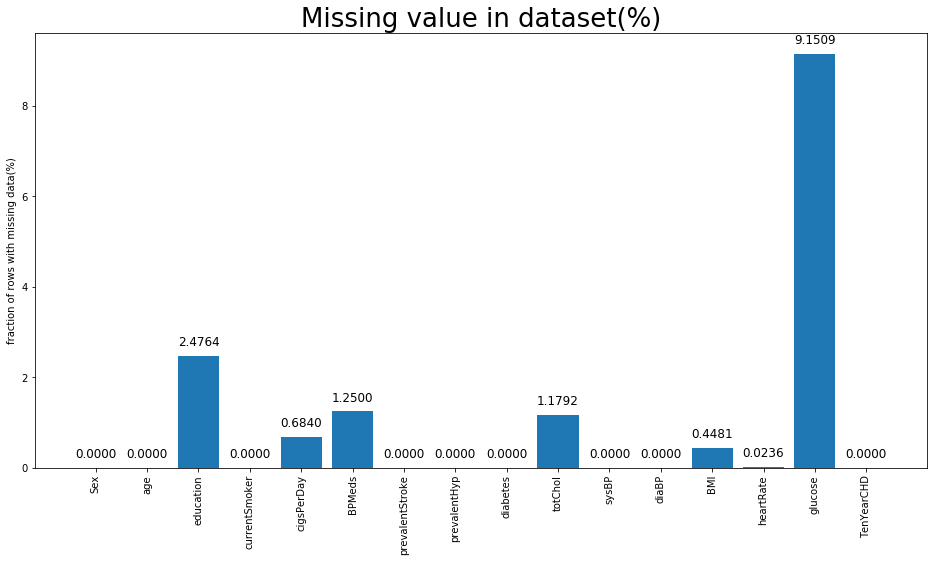

In [9]:
null_counts = heart_df.isnull().sum()*100/heart_df.isnull().count()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data(%)')
plt.bar(np.arange(len(null_counts)),null_counts)
for x,y in zip(np.arange(len(null_counts)),null_counts):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',size=12)
plt.title('Missing value in dataset(%)',size =26) 

#### d) Checking for percentage of missing data

In [10]:
heart_df.isnull().sum()*100/heart_df.isnull().count()

Sex                0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [11]:
print("Missing value:",heart_df.isnull().sum().values.sum())

Missing value: 645


#### e) Replacing all missing values with NaN

In [12]:
heart_df=heart_df.replace(" ",np.NaN)

####  f) Replacing NaN in each column with the respective column Median

In [13]:
heart_df['education'] = heart_df['education'].transform(lambda x:x.fillna(x.median()))
heart_df['cigsPerDay'] = heart_df['cigsPerDay'].transform(lambda x:x.fillna(x.median()))
heart_df['BPMeds'] = heart_df['BPMeds'].transform(lambda x:x.fillna(x.median()))
heart_df['totChol'] = heart_df['totChol'].transform(lambda x:x.fillna(x.median()))
heart_df['BMI'] = heart_df['BMI'].transform(lambda x:x.fillna(x.median()))
heart_df['heartRate'] = heart_df['heartRate'].transform(lambda x:x.fillna(x.median()))
heart_df['glucose'] = heart_df['glucose'].transform(lambda x:x.fillna(x.median()))

#### g) After data transformation checking  Null values in the dataset

In [14]:
heart_df.isnull().sum().values.sum()

0

After data transformation no columns have Null values in the dataset

#### h)Checking for unique values

In [15]:
print ("\nUnique values :  \n",heart_df.nunique())


Unique values :  
 Sex                   2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64


### Summary stats of dataset

In [16]:
heart_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Sex,4240.0,0.429245,0.495027,0.00,0.0000,0.0,1.0000,1.0
age,4240.0,49.580189,8.572942,32.00,42.0000,49.0,56.0000,70.0
education,4240.0,1.979953,1.007087,1.00,1.0000,2.0,3.0000,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.0000,0.0,1.0000,1.0
cigsPerDay,4240.0,8.944340,11.904777,0.00,0.0000,0.0,20.0000,70.0
BPMeds,4240.0,0.029245,0.168513,0.00,0.0000,0.0,0.0000,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.0000,0.0,0.0000,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.0000,0.0,1.0000,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.0000,0.0,0.0000,1.0
totChol,4240.0,236.667689,44.328480,107.00,206.0000,234.0,262.0000,696.0


### [1] Correlation of all the variables with respect to each other

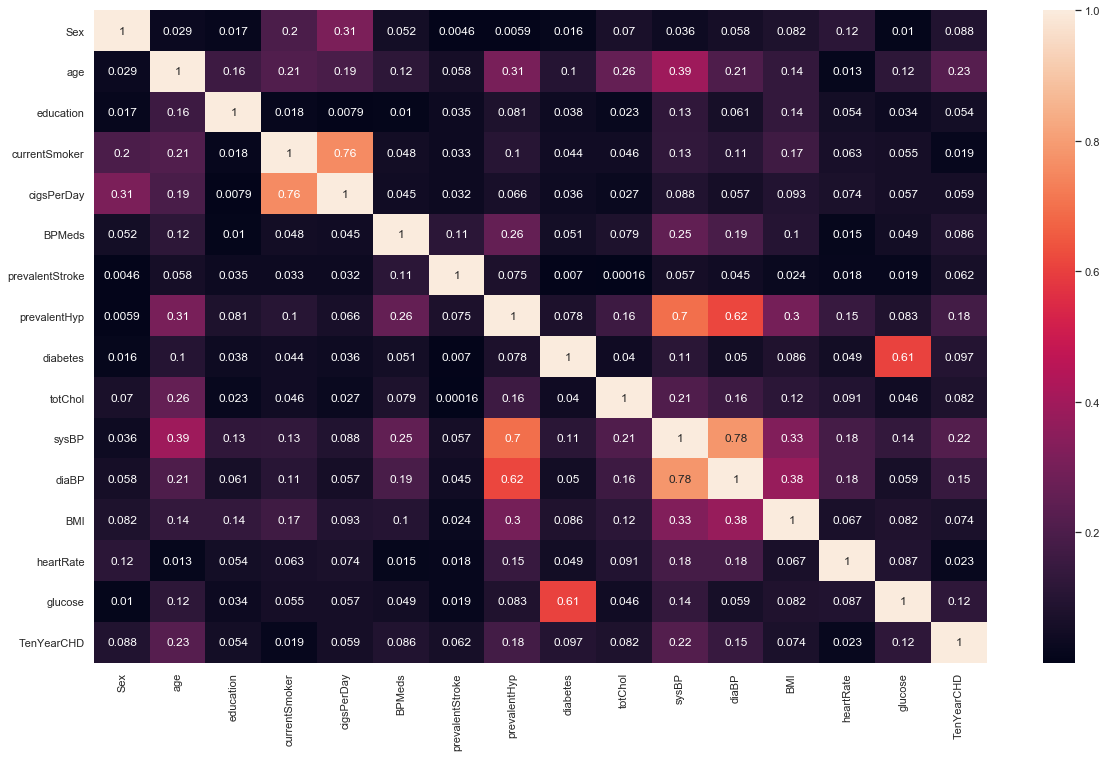

In [17]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(heart_df.corr().abs(),annot=True)

### Setting target variable as TenYearCHD(risk of having a coronory heart disease)

In [17]:
y = heart_df['TenYearCHD']
X = heart_df.drop(['TenYearCHD'], axis = 1)

### Splitting data into Test and Train dataset

In [18]:
#Using  train_test_split to split the dataset into train and test dataset. set random_state = 0.

X_train_org, X_test_org , y_train, y_test = train_test_split(X, y, random_state = 0)

### Scaling

####  a)MinMax Scaling

In [19]:
## Splitting data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
print(X_train)
X_test = scaler.transform(X_test_org)
print(X_test)

[[1.         0.26315789 0.         ... 0.23630635 0.1875     0.16384181]
 [0.         0.65789474 0.33333333 ... 0.25545322 0.11458333 0.07344633]
 [0.         0.31578947 0.         ... 0.27653902 0.16666667 0.10734463]
 ...
 [1.         0.18421053 0.66666667 ... 0.21643238 0.27083333 0.11581921]
 [0.         0.65789474 0.         ... 0.21158507 0.32291667 0.11581921]
 [0.         0.21052632 0.33333333 ... 0.26708677 0.32291667 0.09322034]]
[[0.         0.39473684 0.         ... 0.40063015 0.53125    0.13276836]
 [0.         0.60526316 0.         ... 0.25836161 0.47916667 0.10734463]
 [0.         0.76315789 0.33333333 ... 0.5555017  0.13541667 0.10734463]
 ...
 [0.         0.60526316 0.66666667 ... 0.34222007 0.33333333 0.0819209 ]
 [0.         0.36842105 0.66666667 ... 0.32307319 0.375      0.10451977]
 [1.         0.47368421 0.         ... 0.26660204 0.47916667 0.10169492]]


We have used MinMaxScaler which essentially shrinks the range such that the range is now between 0 and 1 or (-1 to 1 if there are neagative values)

In [20]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (3180, 15)
y_train: (3180,)
X_test: (1060, 15)
y_test: (1060,)


## [D] Classification Tasks

### Evaluation Metrics for Classification

In our dataset we will try to reduce Type II error (false negative), so for Classificaton Tasks our metric of evaluation would be Recall from the Classification Report followed by F1 score and the number of False Positives and False Negatives in the Confusion matrix

### Data is highly imbalanced with Label 0-> 84.8%, Label 1 -> 15.2%
###### So we can not just rely on accuracy as our only scoring function hence we will consider recall and AUC.


### Risk of heart disease -> Class 0 vs 1 Ratio

In [21]:
heart_df.groupby('TenYearCHD').size()

TenYearCHD
0    3596
1     644
dtype: int64

## [1] Voting Classifier

### [a] Hard Voting Classifier

Taking best parameters for the following models from Project 1 and applying hard voting

In [22]:
log_clf = LogisticRegression(C=10, max_iter= 11, penalty= 'l1',random_state=0)
log_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(metric = 'euclidean', n_neighbors =16, p = 1, weights=  'uniform')
knn_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier(max_depth=17, min_samples_leaf=3,random_state= 0)
dt_clf.fit(X_train, y_train)

lin_clf = LinearSVC(C=100,max_iter=49,random_state=0)
lin_clf.fit(X_train, y_train)

svm_clf = SVC(kernel='rbf', probability = True, C= 100, gamma = 0.1)
svm_clf.fit(X_train, y_train)



SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf),('DecisionTree_clf',dt_clf),('LSVC_clf',lin_clf), ('KSVC_clf', svm_clf)], voting='hard')
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=11,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=0, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   met

####  Train accuracy score for hard voting classifier

In [24]:
for clf in (log_clf, knn_clf,dt_clf,lin_clf, svm_clf, hard_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Accuracy score for hard voting : {:.4f}'.format(accuracy_score(y_test, y_pred)))


LogisticRegression Accuracy score for hard voting : 0.8566
KNeighborsClassifier Accuracy score for hard voting : 0.8491
DecisionTreeClassifier Accuracy score for hard voting : 0.7774
LinearSVC Accuracy score for hard voting : 0.8453
SVC Accuracy score for hard voting : 0.8462
VotingClassifier Accuracy score for hard voting : 0.8509


In [25]:
TRS_HardVot=round(hard_voting_clf.score(X_train,y_train),4)
TS_HardVot =round (hard_voting_clf.score(X_test,y_test),4)

print("Train hard voting classifier score : {:.4f}".format(hard_voting_clf.score(X_train,y_train)))
print("Test hard votting classifier  score  : {:.4f}".format(hard_voting_clf.score(X_test,y_test)))

y_pred_HardVot =hard_voting_clf.predict(X_test)

acc_sc_HardVot =round(accuracy_score(y_test,y_pred_HardVot),4)
rec_sc_HardVot =round(recall_score(y_test,y_pred_HardVot),4)
f1_sc_HardVot =round(f1_score(y_test,y_pred_HardVot),4)
auc_sc_HardVot=round(roc_auc_score(y_test,y_pred_HardVot),4)

print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_HardVot)))


r = evaluation.shape[0]
evaluation.loc[r] = ['Hard voting Classification','-',TRS_HardVot,TS_HardVot,acc_sc_HardVot,rec_sc_HardVot,f1_sc_HardVot,auc_sc_HardVot]
evaluation

Train hard voting classifier score : 0.8563
Test hard votting classifier  score  : 0.8509
recall score : 0.0126 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057


### [b] Soft Voting Classifier

In [26]:
soft_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf),('DecisionTree_clf',dt_clf), ('svc', svm_clf)], voting='soft')
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=11,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=0, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   met

#### train accuracy score for soft voting classifier

In [27]:
for clf in (log_clf, knn_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8566037735849057
KNeighborsClassifier 0.8490566037735849
SVC 0.8462264150943396
VotingClassifier 0.8490566037735849


In [28]:
for clf in (log_clf, knn_clf,svm_clf,dt_clf, soft_voting_clf):
    clf.fit(X_test, y_test)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8575471698113207
KNeighborsClassifier 0.85
SVC 0.8575471698113207
DecisionTreeClassifier 0.9443396226415094
VotingClassifier 0.8594339622641509


In [29]:
TRS_SoftVot=round(soft_voting_clf.score(X_train,y_train),4)
TS_SoftVot =round (soft_voting_clf.score(X_test,y_test),4)

print("Train Soft voting classifier score : {:.4f}".format(soft_voting_clf.score(X_train,y_train)))
print("Test Soft votting classifier  score  : {:.4f}".format(soft_voting_clf.score(X_test,y_test)))

y_pred_SoftVot =soft_voting_clf.predict(X_test)

acc_sc_SoftVot =round(accuracy_score(y_test,y_pred_SoftVot),4)
rec_sc_SoftVot =round(recall_score(y_test,y_pred_SoftVot),4)
f1_sc_SoftVot =round(f1_score(y_test,y_pred_SoftVot),4)
auc_sc_SoftVot=round(roc_auc_score(y_test,y_pred_SoftVot),4)

print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_SoftVot)))


r = evaluation.shape[0]
evaluation.loc[r] = ['Soft voting Classification','-',TRS_SoftVot,TS_SoftVot,acc_sc_SoftVot,rec_sc_SoftVot,f1_sc_SoftVot,auc_sc_SoftVot]
evaluation

Train Soft voting classifier score : 0.8478
Test Soft votting classifier  score  : 0.8594
recall score : 0.0629 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314


## [2] Bagging and Pasting

### From our project 1, on the basis of recall score we have chosen following models to apply bagging and pasting method:
###  Decison tree  and Logistic Regression 

### a) Decision Tree Classifier with bagging

In [30]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth = 17, min_samples_leaf =2)
bag_clf = BaggingClassifier(dt_clf, bootstrap=True, random_state=0,oob_score=True)

### Applying grid search on Bagging for Decision Tree Classifier

In [31]:
param_grid={
            'n_estimators' : [10, 50, 100, 500],
             'max_features': [1 , 5, 9, 15 ],
             'max_samples' : [10 ,50 , 100 ,200]
           }
CV_bag =  GridSearchCV(bag_clf,
                            param_grid ,
                             verbose = 1,
                             cv=5)
CV_bag.fit(X_train, y_train)
best_parameters_bag=CV_bag.best_params_
print(best_parameters_bag)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  1.9min finished


{'max_features': 15, 'max_samples': 200, 'n_estimators': 500}


In [32]:
TRS_bag_dt=round(CV_bag.score(X_train,y_train),4)
TS_dt_bag =round (CV_bag.score(X_test,y_test),4)

print("Train bagging score for DT : {:.4f}".format(CV_bag.score(X_train,y_train)))
print("Test bagging score for DT : {:.4f}".format(CV_bag.score(X_test,y_test)))

y_pred_dt_bag =CV_bag.predict(X_test)

acc_sc_dt_bag=round(accuracy_score(y_test,y_pred_dt_bag),4)
rec_sc_dt_bag=round(recall_score(y_test,y_pred_dt_bag),4)
f1_sc_dt_bag =round(f1_score(y_test,y_pred_dt_bag),4)
auc_sc_dt_bag=round(roc_auc_score(y_test,y_pred_dt_bag),4)

print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_dt_bag)))


r = evaluation.shape[0]
evaluation.loc[r] = ['Bagging DecisionTree Classification',best_parameters_bag,TRS_bag_dt,TS_dt_bag,acc_sc_dt_bag,rec_sc_dt_bag,f1_sc_dt_bag,auc_sc_dt_bag]
evaluation

Train bagging score for DT : 0.8541
Test bagging score for DT : 0.8528
recall score : 0.0314 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146


In [33]:
y_pred_dt_bag_new = np.where(CV_bag.predict_proba(X_test)[:, 1]>=0.2, 1, 0)
acc_sc_dt_bag_new=round(accuracy_score(y_test,y_pred_dt_bag_new),4)
rec_sc_dt_bag_new=round(recall_score(y_test,y_pred_dt_bag_new),4)
pre_sc_dt_bag_new=round(precision_score(y_test,y_pred_dt_bag_new),4)
f1_sc_dt_bag_new =round(f1_score(y_test,y_pred_dt_bag_new),4)
auc_sc_dt_bag_new=round(roc_auc_score(y_test,y_pred_dt_bag_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Bagging DecisionTree Classification',
                                     acc_sc_dt_bag_new,rec_sc_dt_bag_new,pre_sc_dt_bag_new,f1_sc_dt_bag_new,auc_sc_dt_bag_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369


###  Pasting for Decision Tree Classifier

#### For pasting change argument to bootstrap= False

In [42]:
past_clf = BaggingClassifier(dt_clf, max_features = 15,max_samples = 200, n_estimators = 500, random_state = 0, bootstrap=False)
past_clf.fit(X_train, y_train)
best_parameters_pas =CV_bag.best_params_

In [43]:
TRS_dt_pas = round(past_clf.score(X_train,y_train),4)
TS_dt_pas =round(past_clf.score(X_test,y_test),4)

print("Train pasting score for DT : {:.4f}".format(past_clf.score(X_train,y_train)))
print("Test bagging score for DT : {:.4f}".format(past_clf.score(X_test,y_test)))

y_pred_dt_pas =past_clf.predict(X_test)

acc_sc_dt_pas=round(accuracy_score(y_test,y_pred_dt_pas),4)
rec_sc_dt_pas=round(recall_score(y_test,y_pred_dt_pas),4)
f1_sc_dt_pas =round(f1_score(y_test,y_pred_dt_pas),4)
auc_sc_dt_pas=round(roc_auc_score(y_test,y_pred_dt_pas),4)

print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_dt_pas)))


r = evaluation.shape[0]
evaluation.loc[r] = ['Pasting DecisionTree Classification',best_parameters_pas,TRS_dt_pas,TS_dt_pas, acc_sc_dt_pas, rec_sc_dt_pas,f1_sc_dt_pas,auc_sc_dt_pas]
evaluation

Train pasting score for DT : 0.8553
Test bagging score for DT : 0.8528
recall score : 0.0314 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146


In [44]:
y_pred_dt_pas_new = np.where(past_clf.predict_proba(X_test)[:, 1]>=0.2, 1, 0)
acc_sc_dt_pas_new=round(accuracy_score(y_test,y_pred_dt_pas_new),4)
rec_sc_dt_pas_new=round(recall_score(y_test,y_pred_dt_pas_new),4)
pre_sc_dt_pas_new=round(precision_score(y_test,y_pred_dt_pas_new),4)
f1_sc_dt_pas_new =round(f1_score(y_test,y_pred_dt_pas_new),4)
auc_sc_dt_pas_new=round(roc_auc_score(y_test,y_pred_dt_pas_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Pasting DecisionTree Classification',
                                     acc_sc_dt_pas_new,rec_sc_dt_pas_new,pre_sc_dt_pas_new,f1_sc_dt_pas_new,auc_sc_dt_pas_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304


###  b) Logistic Regression with bagging

In [45]:
log_clf = LogisticRegression(C=10, max_iter= 11, penalty= 'l1')
bag_log = BaggingClassifier(log_clf, bootstrap=True, random_state=0,oob_score=True)

### Applying grid search on   Logistic Regression 

In [46]:
param_grid={
            'n_estimators' : [10, 50, 100, 500],
             'max_features': [1 , 5, 9, 15 ],
             'max_samples' : [10 ,50 , 100 ,200],
            'random_state' : [0] 
           }
CV_log =  GridSearchCV(bag_log,
                            param_grid ,
                             verbose = 1,
                             cv=5)
CV_log.fit(X_train, y_train)
best_parameters_bag_log =CV_log.best_params_
print(best_parameters_bag)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.2min finished


{'max_features': 15, 'max_samples': 200, 'n_estimators': 500}


In [47]:
TRS_log_bag =round(CV_log.score(X_train,y_train),4)
TS_log_bag =round(CV_log.score(X_test,y_test),4)

print("Train Boosting score for Logistic Regression : {:.4f}".format(CV_log.score(X_train,y_train)))
print("Test Boosting score for Logistic Regression : {:.4f}".format(CV_log.score(X_test,y_test)))

y_pred_log_bag =CV_log.predict(X_test)


acc_sc_log_bag=round(accuracy_score(y_test,y_pred_log_bag),4)
rec_sc_log_bag=round(recall_score(y_test,y_pred_log_bag),4)
f1_sc_log_bag =round(f1_score(y_test,y_pred_log_bag),4)
auc_sc_log_bag =round(roc_auc_score(y_test,y_pred_log_bag),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_log_bag)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Bagging Logistic Regression',best_parameters_bag_log,TRS_log_bag,TS_log_bag, acc_sc_log_bag ,rec_sc_log_bag,f1_sc_log_bag,auc_sc_log_bag]
evaluation

Train Boosting score for Logistic Regression : 0.8500
Test Boosting score for Logistic Regression : 0.8566
recall score : 0.0503 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246


In [48]:
y_pred_log_bag_new = np.where(CV_log.predict_proba(X_test)[:, 1]>=0.2, 1, 0)

acc_sc_log_bag_new=round(accuracy_score(y_test,y_pred_log_bag_new),4)
rec_sc_log_bag_new=round(recall_score(y_test,y_pred_log_bag_new),4)
pre_sc_log_bag_new=round(precision_score(y_test,y_pred_log_bag_new),4)
f1_sc_log_bag_new =round(f1_score(y_test,y_pred_log_bag_new),4)
auc_sc_log_bag_new =round(roc_auc_score(y_test,y_pred_log_bag_new),4)

r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Bagging Logistic Regression',
                                     acc_sc_log_bag_new,rec_sc_log_bag_new,pre_sc_log_bag_new,f1_sc_log_bag_new,auc_sc_log_bag_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609


 After applying best parameters we see that the gap between train and test score becomes smaller.

### Logistic Regression with pasting(using best parameters) 

In [49]:
past_log = BaggingClassifier(log_clf,n_estimators=500, max_samples=200,max_features = 15, bootstrap= False , random_state=0)
past_log.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=11,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=15,
                  max_samples=200, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, verb

In [50]:
TRS_log_pas =round(past_log.score(X_train,y_train),4)
TS_log_pas =round(past_log.score(X_test,y_test),4)

print("Train pasting score for Logistic Classifier : {:.4f}".format(past_log.score(X_train,y_train)))
print("Test pasting score for Logistic Classifier: {:.4f}".format(past_log.score(X_test,y_test)))

y_pred_log_pas =past_log.predict(X_test)

acc_sc_log_pas=round(accuracy_score(y_test,y_pred_log_pas),4)
rec_sc_log_pas=round(recall_score(y_test,y_pred_log_pas),4)
f1_sc_log_pas =round(f1_score(y_test,y_pred_log_pas),4)
auc_sc_log_pas =round(roc_auc_score(y_test,y_pred_log_pas),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_log_pas)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pasting logistic Classifier',best_parameters_bag_log,TRS_log_pas,TS_log_pas,acc_sc_log_pas,rec_sc_log_pas,f1_sc_log_pas,auc_sc_log_pas]
evaluation

Train pasting score for Logistic Classifier : 0.8519
Test pasting score for Logistic Classifier: 0.8575
recall score : 0.0566 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277


In [51]:
y_pred_log_pas_new = np.where(past_log.predict_proba(X_test)[:, 1]>=0.2, 1, 0)

acc_sc_log_pas_new=round(accuracy_score(y_test,y_pred_log_pas_new),4)
rec_sc_log_pas_new=round(recall_score(y_test,y_pred_log_pas_new),4)
pre_sc_log_pas_new=round(precision_score(y_test,y_pred_log_pas_new),4)
f1_sc_log_pas_new =round(f1_score(y_test,y_pred_log_pas_new),4)
auc_sc_log_pas_new =round(roc_auc_score(y_test,y_pred_log_pas_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Pasting Logistic Regression',
                                     acc_sc_log_pas_new,rec_sc_log_pas_new,pre_sc_log_pas_new,f1_sc_log_pas_new,auc_sc_log_pas_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620


## [3] AdaBoosting 

### We will apply ada boosting to the following models :

### a) Applying AdaBoost to Decision Tree Classifier

In [107]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth = 17, min_samples_leaf =2)
ada_clf = AdaBoostClassifier(dt_clf,random_state=0)

### Applying grid search to find the best parameters for adaboosting on decision tree classifier

In [108]:
param_grid_dtree = {
            'n_estimators' : [10, 50, 100, 500],
            'learning_rate': [0.05 ,0.1, 0.5, 1]
             }
CV_dtree_ada =  GridSearchCV(ada_clf,
                            param_grid_dtree ,
                             verbose = 1,
                             cv=5)
CV_dtree_ada.fit(X_train, y_train)

best_parameters_dtree_ada =CV_dtree_ada.best_params_
print(best_parameters_dtree_ada)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.9min finished


{'learning_rate': 0.05, 'n_estimators': 50}


In [109]:
TRS_dt_ada =round(CV_dtree_ada.score(X_train,y_train),4)
TS_dt_ada =round(CV_dtree_ada.score(X_test,y_test),4)

print("Train score for DT Classification: {:.4f}".format(CV_dtree_ada.score(X_train,y_train)))
print("Test  score for DT Classification: {:.4f}".format(CV_dtree_ada.score(X_test,y_test)))

y_pred_dt_ada = CV_dtree_ada.predict(X_test)

acc_sc_dt_ada=round(accuracy_score(y_test,y_pred_dt_ada),4)
rec_sc_dt_ada=round(recall_score(y_test,y_pred_dt_ada),4)
f1_sc_dt_ada =round(f1_score(y_test,y_pred_dt_ada),4)
auc_sc_dt_ada =round(roc_auc_score(y_test,y_pred_dt_ada),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_dt_ada)))

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoosting DecisionTree Classification',best_parameters_dtree_ada,TRS_dt_ada,TS_dt_ada,acc_sc_dt_ada,rec_sc_dt_ada,f1_sc_dt_ada,auc_sc_dt_ada]
evaluation

Train score for DT Classification: 1.0000
Test  score for DT Classification: 0.8547
recall score : 0.0503 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


In [54]:
y_pred_dt_ada_new = np.where(CV_dtree_ada.predict_proba(X_test)[:, 1]>=0.2, 1, 0)

acc_sc_dt_ada_new=round(accuracy_score(y_test,y_pred_dt_ada_new),4)
rec_sc_dt_ada_new=round(recall_score(y_test,y_pred_dt_ada_new),4)
pre_sc_dt_ada_new=round(precision_score(y_test,y_pred_dt_ada_new),4)
f1_sc_dt_ada_new =round(f1_score(y_test,y_pred_dt_ada_new),4)
auc_sc_dt_ada_new =round(roc_auc_score(y_test,y_pred_dt_ada_new),4)

r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['AdaBoosting DecisionTree Classification',acc_sc_dt_ada_new,rec_sc_dt_ada_new,pre_sc_dt_ada_new,f1_sc_dt_ada_new,auc_sc_dt_ada_new]
evaluation_updated
                                     

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620
4,AdaBoosting DecisionTree Classification,0.8547,0.0566,0.6923,0.1047,0.5261


After training the AdaBoost model on the best paramters , we see that the gap between training and test score 
has become smaller.

### b) Applying AdaBoost on Logistic Regression

In [55]:
log_clf = LogisticRegression(C=10, max_iter= 11, penalty= 'l1')
ada_log_clf = AdaBoostClassifier(log_clf, random_state=0)
ada_log_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=10, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None, max_iter=11,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l1',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=0)

### Applying grid search to find the best parameters for adaboosting on Logistic Regression

In [56]:
param_grid_log_ada = {
            'n_estimators' : [10, 50, 100],
            'learning_rate': [0.1, 0.5, 1],
            'random_state' :[0]
             }
CV_log_ada =  GridSearchCV(ada_clf,
                            param_grid_log_ada ,
                             verbose = 1,
                             cv=5,n_jobs=-1)
CV_log_ada.fit(X_train, y_train)

best_parameters_log_ada =CV_log_ada.best_params_
print(best_parameters_log_ada)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.4s finished


{'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 0}


In [57]:
TRS_log_ada =round(CV_log_ada.score(X_train,y_train),4)
TS_log_ada =round(CV_log_ada.score(X_test,y_test),4)

print("Train score for adaboosting Logistic Regression: {:.4f}".format(CV_log_ada.score(X_train,y_train)))
print("Test  score for adaboosting Logistic Regression: {:.4f}".format(CV_log_ada.score(X_test,y_test)))
y_pred_log_ada = CV_log_ada.predict(X_test)

acc_sc_log_ada=round(accuracy_score(y_test,y_pred_log_ada),4)
rec_sc_log_ada=round(recall_score(y_test,y_pred_log_ada),4)
f1_sc_log_ada =round(f1_score(y_test,y_pred_log_ada),4)
auc_sc_log_ada =round(roc_auc_score(y_test,y_pred_log_ada),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_log_ada)))


r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoosting Logistic Regression',best_parameters_log_ada,TRS_log_ada,TS_log_ada,acc_sc_log_ada,rec_sc_log_ada,f1_sc_log_ada,auc_sc_log_ada]
evaluation

Train score for adaboosting Logistic Regression: 1.0000
Test  score for adaboosting Logistic Regression: 0.8500
recall score : 0.0566 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233


In [58]:
y_pred_log_ada_new = np.where(CV_log_ada.predict_proba(X_test)[:, 1]>=0.2, 1, 0)

acc_sc_log_ada_new=round(accuracy_score(y_test,y_pred_log_ada_new),4)
rec_sc_log_ada_new=round(recall_score(y_test,y_pred_log_ada_new),4)
pre_sc_log_ada_new=round(precision_score(y_test,y_pred_log_ada_new),4)
f1_sc_log_ada_new =round(f1_score(y_test,y_pred_log_ada_new),4)
auc_sc_log_ada_new =round(roc_auc_score(y_test,y_pred_log_ada_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Adaboosting Logistic Regression',acc_sc_log_ada_new,rec_sc_log_ada_new,pre_sc_log_ada_new,f1_sc_log_ada_new,auc_sc_log_ada_new]
evaluation_updated
                        

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620
4,AdaBoosting DecisionTree Classification,0.8547,0.0566,0.6923,0.1047,0.5261
5,Adaboosting Logistic Regression,0.8453,0.0566,0.3913,0.0989,0.5205


After training the AdaBoost model on the best paramters , we see that the gap between training and test score has become smaller.

## [4] Gradient Boosting

In [59]:
gd_clf = GradientBoostingClassifier( random_state= 0)
gd_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

###  Applying  grid search on Gradient Boosting

In [60]:
param_grid_gd = {
             'max_depth' :[3,5,7,10],
            'n_estimators' : [10, 50, 100,500],
            'learning_rate': [0.1, 0.5, 1],
            'random_state' :[0]
             }
CV_gd=  GridSearchCV(gd_clf,
                            param_grid_gd ,
                             verbose = 1,
                             cv=5,n_jobs=-1)
CV_gd.fit(X_train, y_train)
best_parameters_gd=CV_gd.best_params_
print(best_parameters_gd)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.9min finished


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0}


In [61]:
TRS_gb = round(CV_gd.score(X_train,y_train),4)
TS_gb =round(CV_gd.score(X_test,y_test),4)

print("Train score for GB Classifier: {:.4f}".format(CV_gd.score(X_train,y_train)))
print("Test  score for GB Classifier:: {:.4f}".format(CV_gd.score(X_test,y_test)))
y_pred_GB = CV_gd.predict(X_test)

acc_sc_gb=round(accuracy_score(y_test,y_pred_GB),4)
rec_sc_gb=round(recall_score(y_test,y_pred_GB),4)
f1_sc_gb =round(f1_score(y_test,y_pred_GB),4)
auc_sc_gb =round(roc_auc_score(y_test,y_pred_GB),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_GB)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Classification',best_parameters_gd,TRS_gb,TS_gb,acc_sc_gb,rec_sc_gb,f1_sc_gb,auc_sc_gb]
evaluation

Train score for GB Classifier: 0.8717
Test  score for GB Classifier:: 0.8462
recall score : 0.0692 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263


In [62]:
y_pred_gb_new = np.where(CV_gd.predict_proba(X_test)[:, 1]>=0.2, 1, 0)

acc_sc_gb_new=round(accuracy_score(y_test,y_pred_gb_new),4)
rec_sc_gb_new=round(recall_score(y_test,y_pred_gb_new),4)
pre_sc_gb_new=round(precision_score(y_test,y_pred_gb_new),4)
f1_sc_gb_new =round(f1_score(y_test,y_pred_gb_new),4)
auc_sc_gb_new =round(roc_auc_score(y_test,y_pred_gb_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Gradient Boosting Classification',acc_sc_gb_new,rec_sc_gb_new,pre_sc_gb_new,f1_sc_gb_new,auc_sc_gb_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620
4,AdaBoosting DecisionTree Classification,0.8547,0.0566,0.6923,0.1047,0.5261
5,Adaboosting Logistic Regression,0.8453,0.0566,0.3913,0.0989,0.5205
6,Gradient Boosting Classification,0.7472,0.3774,0.2620,0.3093,0.5949


After applying the best parameters we found that the training  and testing score improved.

## [5] Random Forest Classifier



In [63]:
rnd_clf = RandomForestClassifier(random_state = 0)
param_grid_rf= {
            'n_estimators':[100,500,1000],
              'max_depth':range(1,10)
            }

grid_rf=GridSearchCV(rnd_clf,param_grid_rf,cv=5)
grid_rf.fit(X_train,y_train)

best_parameters_rf =grid_rf.best_params_
print(best_parameters_rf)

{'max_depth': 9, 'n_estimators': 100}


In [64]:
TRS_rf =round(grid_rf.score(X_train,y_train),4)
TS_rf =round(grid_rf.score(X_test,y_test),4)

print("Train score for RF Classifier: {:.4f}".format(grid_rf.score(X_train,y_train)))
print("Test  score for RF Classifier: {:.4f}".format(grid_rf.score(X_test,y_test)))
y_pred_rf = grid_rf.predict(X_test)

acc_sc_rf=round(accuracy_score(y_test,y_pred_rf),4)
rec_sc_rf=round(recall_score(y_test,y_pred_rf),4)
f1_sc_rf =round(f1_score(y_test,y_pred_rf),4)
auc_sc_rf =round(roc_auc_score(y_test,y_pred_rf),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_rf)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest Classification',best_parameters_rf,TRS_rf,TS_rf,acc_sc_rf,rec_sc_rf,f1_sc_rf,auc_sc_rf]
evaluation

Train score for RF Classifier: 0.8836
Test  score for RF Classifier: 0.8519
recall score : 0.0440 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192


In [65]:
y_pred_rf_new = np.where(grid_rf.predict_proba(X_test)[:, 1]>=0.2, 1, 0)

acc_sc_rf_new=round(accuracy_score(y_test,y_pred_rf_new),4)
rec_sc_rf_new=round(recall_score(y_test,y_pred_rf_new),4)
pre_sc_rf_new=round(precision_score(y_test,y_pred_rf_new),4)
f1_sc_rf_new =round(f1_score(y_test,y_pred_rf_new),4)
auc_sc_rf_new =round(roc_auc_score(y_test,y_pred_rf_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Random Forest Classification',acc_sc_rf_new,rec_sc_rf_new,pre_sc_rf_new,f1_sc_rf_new,auc_sc_rf_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620
4,AdaBoosting DecisionTree Classification,0.8547,0.0566,0.6923,0.1047,0.5261
5,Adaboosting Logistic Regression,0.8453,0.0566,0.3913,0.0989,0.5205
6,Gradient Boosting Classification,0.7472,0.3774,0.2620,0.3093,0.5949
7,Random Forest Classification,0.7368,0.4654,0.2761,0.3466,0.6250


In [66]:
print(" Best parameter:",grid_rf.best_params_)
print("Train score for RF Classification: {:.4f}".format(grid_rf.score(X_train,y_train)))
print("Test  score for RF Classification: {:.4f}".format(grid_rf.score(X_test,y_test)))
rnd_clf1 = RandomForestClassifier(n_estimators= 100, max_depth= 9, random_state = 0)
rnd_clf1.fit(X_train,y_train)

 Best parameter: {'max_depth': 9, 'n_estimators': 100}
Train score for RF Classification: 0.8836
Test  score for RF Classification: 0.8519


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Feature Selection using Random Forest

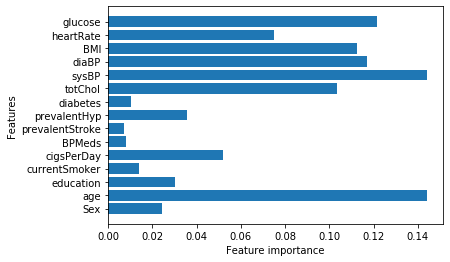

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importance_HeartStudy(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    
plot_feature_importance_HeartStudy(rnd_clf1)

Total cholestrol and Age seems to be the two most important features

## ROC Curve

ROC Curve for Ensembled Model at default Thershold

#### Bagging classification with decision tree
#### Bagging Logistic Regression
#### Gradient boosting Classification
#### Random Forest Classification

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.4min finished


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.6min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


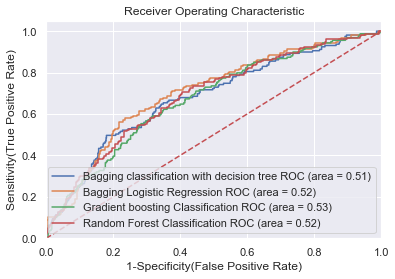

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure()
sns.set(rc={'figure.figsize':(20,12)})

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Bagging classification with decision tree',
    'model': CV_bag,
},
{
    'label': 'Bagging Logistic Regression',
    'model': CV_log,
},
   
{
    'label': 'Gradient boosting Classification',
    'model': CV_gd,
},
{
    'label': 'Random Forest Classification',
    'model': grid_rf,
},

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

## PCA 

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

Text(0, 0.5, 'cumulative explianed variance')

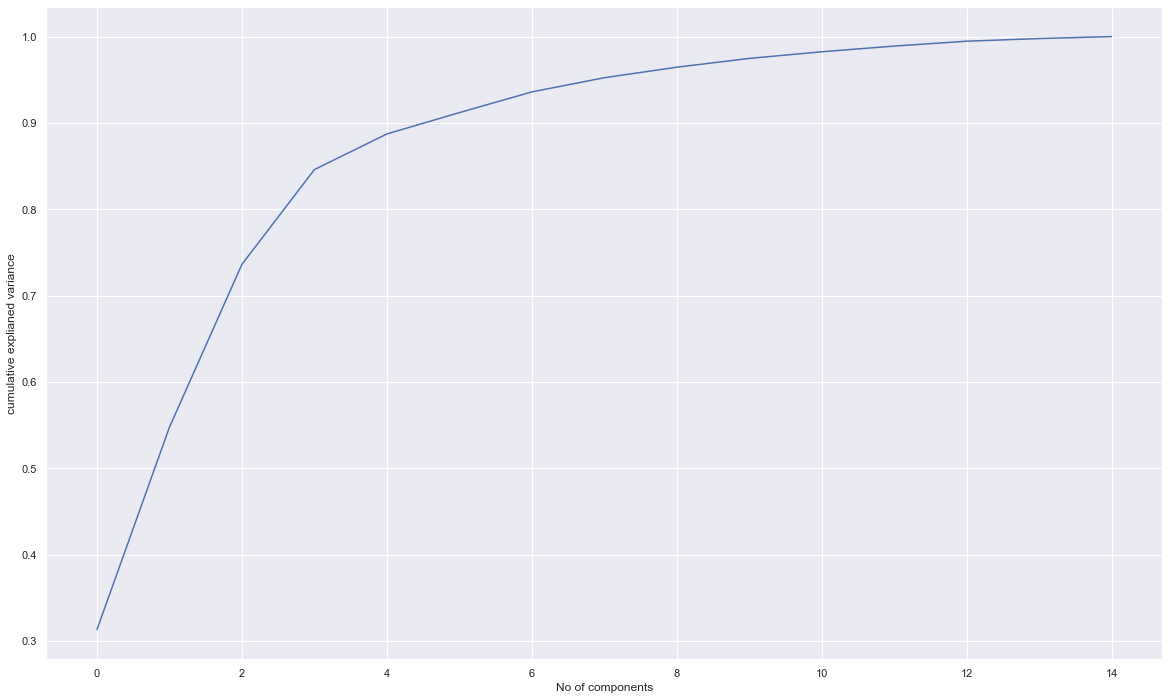

In [70]:
pca =PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("cumulative explianed variance")

In [71]:
X_train.shape

(3180, 15)

In [72]:
X_train_reduced.shape

(3180, 8)

features have been reduced from 15 to 8

### KNN

In [73]:
knn = KNeighborsClassifier()
param_grid_knn = {
            'n_neighbors' : range(1,20),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

grid_knn_pca = GridSearchCV(estimator =knn, param_grid = param_grid_knn ,cv=5, return_train_score=True, verbose = 1, n_jobs = -1)
grid_knn_pca.fit(X_train_reduced, y_train)

best_parameters_knn_pca=grid_knn_pca.best_params_
print(best_parameters_knn_pca)

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed:   51.3s


{'algorithm': 'auto', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  1.5min finished


In [74]:
y_pred_knn_pca=grid_knn_pca.predict(X_test_reduced)

TRS_knn_pca =round(grid_knn_pca.score(X_train_reduced, y_train),4)
TS_knn_pca =round(grid_knn_pca.score(X_test_reduced, y_test),4)

print('Train score: {:.4f} '.format(grid_knn_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f} '.format(grid_knn_pca.score(X_test_reduced, y_test)))

acc_sc_knn_pca=round(accuracy_score(y_test,y_pred_knn_pca),4)
rec_sc_knn_pca=round(recall_score(y_test,y_pred_knn_pca),4)
f1_knn_pca =round(f1_score(y_test,y_pred_knn_pca),4)
auc_sc_knn_pca =round(roc_auc_score(y_test,y_pred_knn_pca),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_knn_pca)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Knn classification',best_parameters_knn_pca,TRS_knn_pca,TS_knn_pca,acc_sc_knn_pca, rec_sc_knn_pca,f1_knn_pca,auc_sc_knn_pca]
evaluation

Train score: 0.8509 
Test score: 0.8509 
recall score : 0.0440 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### Decision Tree classifier

In [75]:
dtree = DecisionTreeClassifier(random_state=0)
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

grid_tree_pca = GridSearchCV(estimator =dtree, param_grid = param_grid_tree ,cv=5, return_train_score=True, verbose = 1, n_jobs = -1)
grid_tree_pca.fit(X_train_reduced, y_train)

best_parameters_tree_pca=grid_tree_pca.best_params_
print(best_parameters_tree_pca)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 1, 'min_samples_leaf': 1}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    2.3s finished


In [77]:
y_pred_tree_pca =grid_tree_pca.predict(X_test_reduced)

TRS_dt_pca =round(grid_tree_pca.score(X_train_reduced, y_train),4)
TS_dt_pca =round(grid_tree_pca.score(X_test_reduced, y_test),4)

print('Train score: ',TRS_dt_pca)
print('Test score: ',TS_dt_pca)

acc_sc_dt_pca=round(accuracy_score(y_test,y_pred_tree_pca),4)
rec_sc_dt_pca=round(recall_score(y_test,y_pred_tree_pca),4)
f1_dt_pca =round(f1_score(y_test,y_pred_tree_pca),4)
auc_sc_dt_pca =round(roc_auc_score(y_test,y_pred_tree_pca),4)

print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_tree_pca)))
r = evaluation.shape[0]
evaluation.loc[r] = ['Pca DecisionTree Classification',best_parameters_tree_pca,TRS_dt_pca,TS_dt_pca,acc_sc_dt_pca,rec_sc_dt_pca,f1_dt_pca,auc_sc_dt_pca]
evaluation

Train score:  0.8475
Test score:  0.85
recall score : 0.0000 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


In [78]:
dtree_clf_pca=DecisionTreeClassifier(max_depth= 1, min_samples_leaf= 1, random_state=0)
dtree_clf_pca.fit(X_train_reduced ,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

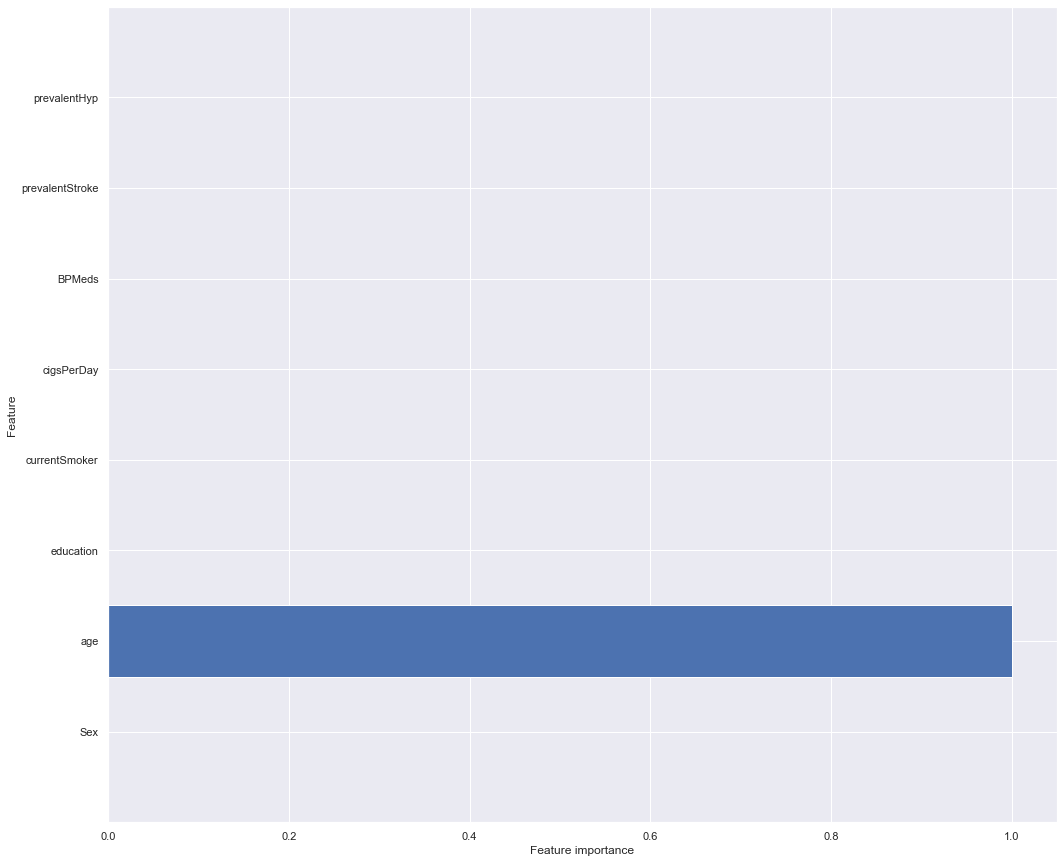

In [79]:
%matplotlib inline
def plot_feature_importances_CDH(model):
    sns.set(rc={'figure.figsize':(17,15)})
    n_features = X_train_reduced.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_CDH(dtree_clf_pca)

### Logistic Regression

In [82]:
lreg_pca =LogisticRegression(random_state=0)
param_grid_logit_pca = {
            'max_iter' : range(1,200),
            'penalty' : ['l1','l2'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_logit_pca = GridSearchCV(estimator =lreg_pca, param_grid = param_grid_logit_pca ,cv=5, scoring='recall', verbose = 1, n_jobs = -1,return_train_score = True)
CV_logit_pca.fit(X_train_reduced, y_train)

best_parameters_logit_class_pca=CV_logit_pca.best_params_
print(best_parameters_logit_class_pca)

Fitting 5 folds for each of 2786 candidates, totalling 13930 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 12160 tasks      | elapsed:  1.2min


{'C': 100, 'max_iter': 4, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 13930 out of 13930 | elapsed:  1.3min finished


In [83]:
y_pred_logit_pca =CV_logit_pca.predict(X_test_reduced)

TRS_logit_pca =round(CV_logit_pca.score(X_train_reduced, y_train),4)
TS_logit_pca =round(CV_logit_pca.score(X_test_reduced, y_test),4)
print('Train score: ',TRS_logit_pca)
print('Test score: ',TS_logit_pca)

acc_sc_log_pca=round(accuracy_score(y_test,y_pred_logit_pca),4)
rec_sc_log_pca=round(recall_score(y_test,y_pred_logit_pca),4)
f1_dt_log_pca =round(f1_score(y_test,y_pred_logit_pca),4)
auc_sc_log_pca =round(roc_auc_score(y_test,y_pred_logit_pca),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_logit_pca)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Logistic Regression',best_parameters_logit_class_pca,TRS_logit_pca,TS_logit_pca,acc_sc_log_pca,rec_sc_log_pca,f1_dt_log_pca,auc_sc_log_pca]
evaluation

Train score:  0.0536
Test score:  0.0692
recall score : 0.0692 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### Linear Support Vector Machine

In [84]:
lin_clf_pca = LinearSVC(random_state=0)
param_grid_linearSVM_pca = {
            'max_iter' : range(1,200),
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_linearSVM_pca = GridSearchCV(estimator =lin_clf_pca, param_grid = param_grid_linearSVM_pca ,cv=5, scoring='recall', verbose = 1, n_jobs = -1,return_train_score = True)
CV_linearSVM_pca.fit(X_train_reduced, y_train)

best_parameters_linearSVM_pca = CV_linearSVM_pca.best_params_
print(best_parameters_linearSVM_pca)

Fitting 5 folds for each of 1393 candidates, totalling 6965 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:   21.6s


{'C': 1000, 'max_iter': 147}


[Parallel(n_jobs=-1)]: Done 6965 out of 6965 | elapsed:   45.9s finished


In [85]:
y_pred_svm_pca =CV_linearSVM_pca.predict(X_test_reduced)

TRS_LSVM_pca =round(CV_linearSVM_pca.score(X_train_reduced, y_train),4)
TS_LSVM_pca =round(CV_linearSVM_pca.score(X_test_reduced, y_test),4)
print('Train score: {:.4f} '.format(CV_linearSVM_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f} '.format(CV_linearSVM_pca.score(X_test_reduced, y_test)))

acc_sc_LSVM_pca=round(accuracy_score(y_test,y_pred_svm_pca),4)
rec_sc_LSVM_pca=round(recall_score(y_test,y_pred_svm_pca),4)
f1_dt_LSVM_pca =round(f1_score(y_test,y_pred_svm_pca),4)
auc_sc_LSVM_pca =round(roc_auc_score(y_test,y_pred_svm_pca),4)
print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_svm_pca)))


r = evaluation.shape[0]
evaluation.loc[r] = ['Pca LSVM Classification',best_parameters_linearSVM_pca,TRS_LSVM_pca,TS_LSVM_pca,acc_sc_LSVM_pca,rec_sc_LSVM_pca,f1_dt_LSVM_pca,auc_sc_LSVM_pca]
evaluation

Train score: 0.2433 
Test score: 0.2390 
recall score : 0.2390 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### Kernelized Support Vector Machine

In [86]:
param_grid_KSVM_pca = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel':['linear','rbf']}
grid_KSVR_pca = GridSearchCV(SVC(random_state=0), param_grid_KSVM_pca, cv=5, return_train_score=True)
grid_KSVR_pca.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [87]:
best_parameters_KSVM_pca =grid_KSVR_pca.best_params_
y_pred_kernelizedsvc_pca=grid_KSVR_pca.predict(X_test_reduced)

TRS_KSVM_pca =round(grid_KSVR_pca.score(X_train_reduced, y_train),4)
TS_KSVM_pca =round(grid_KSVR_pca.score(X_test_reduced, y_test),4)

print('Train score: {:.4f} '.format(grid_KSVR_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f} '.format(grid_KSVR_pca.score(X_test_reduced, y_test)))

acc_sc_KSVM_pca=round(accuracy_score(y_test,y_pred_kernelizedsvc_pca),4)
rec_sc_KSVM_pca=round(recall_score(y_test,y_pred_kernelizedsvc_pca),4)
f1_sc_KSVM_pca =round(f1_score(y_test,y_pred_kernelizedsvc_pca),4)
auc_sc_KSVM_pca =round(roc_auc_score(y_test,y_pred_kernelizedsvc_pca),4)

print('recall score : {:.4f} '.format(recall_score(y_test,y_pred_kernelizedsvc_pca)))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca kernelized SVM Classification',best_parameters_KSVM_pca,TRS_KSVM_pca,TS_KSVM_pca,acc_sc_KSVM_pca,rec_sc_KSVM_pca,f1_sc_KSVM_pca,auc_sc_KSVM_pca]
evaluation

Train score: 0.8522 
Test score: 0.8491 
recall score : 0.0252 


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8500,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1.0000,0.8500,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


## Deep learning models

## Neural Network

In [88]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [89]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(10, input_dim = 15, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3180/3180 [==============================] - 0s 95us/sample - loss: 0.7452 - acc: 0.3022
Epoch 2/20
3180/3180 [==============================] - 0s 23us/sample - loss: 0.6400 - acc: 0.7459
Epoch 3/20
3180/3180 [==============================] - 0s 27us/sample - loss: 0.5430 - acc: 0.8475
Epoch 4/20
3180/3180 [==============================] - 0s 23us/sample - loss: 0.4795 - acc: 0.8475
Epoch 5/20
3180/3180 [==============================] - 0s 25us/sample - loss: 0.4523 - acc: 0.8475
Epoch 6/20
3180/3180 [==============================] - 0s 30us/sample - loss: 0.4425 - acc: 0.8475
Epoch 7/20
3180/3180 [==============================] - 0s 26us/sample - loss: 0.4369 - acc: 0.8475
Epoch 8/20
3180/3180 [==============================] - 0s 31us/sample - loss: 0.4316 - acc: 0.8475
Epoch 9/20
3180/3180 [==============================] - 0s 30us/sample - loss: 0

In [90]:
model1.evaluate(X_train, y_train)

3180/3180 [==============================] - 0s 47us/sample - loss: 0.3978 - acc: 0.8478


[0.3978177569947153, 0.84779876]

In [91]:
model1.evaluate(X_test, y_test)

1060/1060 [==============================] - 0s 28us/sample - loss: 0.4007 - acc: 0.8528


[0.40074017379643784, 0.8528302]

In [92]:
y_pred = model1.predict(X_train)

In [93]:
from sklearn.metrics import recall_score
y_pred_neural = model1.predict(X_test)
y_test_pred = np.where(y_pred_neural >= 0.5, 1, 0)
acc_sc_neural=round(accuracy_score(y_test,y_test_pred),4)
rec_sc_neural=round(recall_score(y_test,y_test_pred),4)

f1_sc_neural =round(f1_score(y_test,y_test_pred),4)
auc_sc_neural =round(roc_auc_score(y_test,y_test_pred),4)

r = evaluation.shape[0]
evaluation.loc[r] = ['Neural network classification','-','-','-',acc_sc_neural,rec_sc_neural,f1_sc_neural,auc_sc_neural]
evaluation


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


In [94]:
y_pred_neural_new = np.where(y_pred_neural >= 0.2, 1, 0)
acc_sc_neural_new=round(accuracy_score(y_test,y_pred_neural_new),4)
rec_sc_neural_new=round(recall_score(y_test,y_pred_neural_new),4)
pre_sc_neural_new=round(precision_score(y_test,y_pred_neural_new),4)
f1_sc_neural_new =round(f1_score(y_test,y_pred_neural_new),4)
auc_sc_neural_new =round(roc_auc_score(y_test,y_pred_neural_new),4)


r_updated = evaluation_updated.shape[0]
evaluation_updated.loc[r_updated] = ['Neural Network Classification',acc_sc_neural_new,rec_sc_neural_new,pre_sc_neural_new,f1_sc_neural_new,auc_sc_neural_new]
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620
4,AdaBoosting DecisionTree Classification,0.8547,0.0566,0.6923,0.1047,0.5261
5,Adaboosting Logistic Regression,0.8453,0.0566,0.3913,0.0989,0.5205
6,Gradient Boosting Classification,0.7472,0.3774,0.2620,0.3093,0.5949
7,Random Forest Classification,0.7368,0.4654,0.2761,0.3466,0.6250
8,Neural Network Classification,0.7085,0.4528,0.2449,0.3179,0.6032


## Base Model

### [1] Knn Classification

In [95]:
Knn = KNeighborsClassifier()
param_grid_knn = {
            'n_neighbors':range(1,20),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'metric': ['euclidean','manhattan']
            }
grid_knn = GridSearchCV(knn,param_grid_knn , verbose = 1,cv=5, n_jobs = -1)
grid_knn.fit(X_train, y_train)

best_parameters_knn=grid_knn.best_params_
print(best_parameters_knn)

Fitting 5 folds for each of 152 candidates, totalling 760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    6.1s


{'metric': 'euclidean', 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:   10.9s finished


### Using best parameters from Grid Search for KNN Classifier

In [96]:
y_pred_knn =grid_knn.predict(X_test)

TRS_knn =round(grid_knn.score(X_train, y_train),4)
TS_knn=round(grid_knn.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_knn.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_knn.score(X_test, y_test)))

acc_sc_knn =round(accuracy_score(y_test,y_pred_knn),4)
print(acc_sc_knn)
rec_sc_knn =round(recall_score(y_test,y_pred_knn),4)
print(rec_sc_knn)
f1_sc_Knn =round(f1_score(y_test, y_pred_knn),4)
auc_sc_Knn =round(roc_auc_score(y_test, y_pred_knn),4)

r = evaluation.shape[0]
evaluation.loc[r] = ['Knn Classification',best_parameters_knn,TRS_knn,TS_knn,acc_sc_knn,rec_sc_knn,f1_sc_Knn,auc_sc_Knn]
evaluation


Train score: 0.8503 
Test score: 0.8491 
0.8491
0.0063


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### [2] Decision Tree Classifier

In [97]:
dtree =DecisionTreeClassifier(random_state=0)
param_grid_treeclass = {
            'max_depth' : range(1,20),
            'min_samples_leaf' : range(2,50)
            }

grid_dtree = GridSearchCV(estimator =dtree,cv=5, param_grid = param_grid_treeclass , scoring='recall', verbose = 1, n_jobs = -1)
grid_dtree.fit(X_train, y_train)

best_parameters_dtree=grid_dtree.best_params_
print(best_parameters_dtree)

Fitting 5 folds for each of 912 candidates, totalling 4560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    3.3s


{'max_depth': 17, 'min_samples_leaf': 2}


[Parallel(n_jobs=-1)]: Done 4560 out of 4560 | elapsed:   18.3s finished


In [98]:
y_pred_dtree =grid_dtree.predict(X_test)

TRS_dtree =round(grid_dtree.score(X_train, y_train),4)
TS_dtree=round(grid_dtree.score(X_test, y_test),4)

print('Train score: {:.4f} '.format(grid_dtree.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_dtree.score(X_test, y_test)))

acc_sc_dtree =round(accuracy_score(y_test,y_pred_dtree),4)
print(acc_sc_dtree)
rec_sc_dtree =round(recall_score(y_test,y_pred_dtree),4)
print(rec_sc_dtree)
f1_sc_dtree =round(f1_score(y_test, y_pred_dtree),4)
auc_sc_dtree =round(roc_auc_score(y_test, y_pred_dtree),4)

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision tree Classification',best_parameters_dtree,TRS_dtree,TS_dtree,acc_sc_dtree,rec_sc_dtree,f1_sc_dtree,auc_sc_dtree]
evaluation

Train score: 0.7340 
Test score: 0.2201 
0.7915
0.2201


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### [3] Logistic Regression

In [99]:
lreg_clf = LogisticRegression(random_state=0)
param_grid_logit = {
            'max_iter' : range(1,200),
            'penalty' : ['l1','l2'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

grid_log = GridSearchCV(estimator =lreg_clf, param_grid = param_grid_logit ,cv=5, scoring='recall', verbose = 1, n_jobs = -1,return_train_score = True)
grid_log.fit(X_train, y_train)

best_parameters_logit =grid_log.best_params_
print(best_parameters_logit)

Fitting 5 folds for each of 2786 candidates, totalling 13930 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3320 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 7820 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 12347 tasks      | elapsed:  1.5min


{'C': 100, 'max_iter': 13, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 13930 out of 13930 | elapsed:  1.8min finished


In [100]:
y_pred_logistic =grid_log.predict(X_test)

TRS_log =round(grid_log.score(X_train, y_train),4)
TS_log=round(grid_log.score(X_test, y_test),4)

print('Train score: {:.4f} '.format(grid_log.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_log.score(X_test, y_test)))

acc_sc_log =round(accuracy_score(y_test,y_pred_logistic),4)
print(acc_sc_log)
rec_sc_log =round(recall_score(y_test,y_pred_logistic),4)
print(rec_sc_log)
f1_sc_log =round(f1_score(y_test, y_pred_logistic),4)
auc_sc_log =round(roc_auc_score(y_test, y_pred_logistic),4)

r = evaluation.shape[0]
evaluation.loc[r] = [' Logistic Regression ',best_parameters_logit,TRS_log,TS_log,acc_sc_log,rec_sc_log,f1_sc_log,auc_sc_log]
evaluation

Train score: 0.0928 
Test score: 0.0818 
0.8575
0.0818


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### [4] Linear Support Vector Machine Classifier

In [101]:
clf =LinearSVC(random_state=0)
param_grid_linearSVM = {
            'max_iter' : range(1,200),
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

grid_LSVM = GridSearchCV(estimator =clf, param_grid = param_grid_linearSVM ,cv=5, scoring='recall', verbose = 1, n_jobs = -1,return_train_score = True)
grid_LSVM.fit(X_train, y_train)

best_parameters_linearSVM_class = grid_LSVM.best_params_
print(best_parameters_linearSVM_class)

Fitting 5 folds for each of 1393 candidates, totalling 6965 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 4148 tasks      | elapsed:   23.3s


{'C': 1000, 'max_iter': 153}


[Parallel(n_jobs=-1)]: Done 6965 out of 6965 | elapsed:   54.3s finished


In [102]:
y_pred_LSVM =grid_LSVM.predict(X_test)

TRS_LSVM =round(grid_LSVM.score(X_train, y_train),4)
TS_LSVM=round(grid_LSVM.score(X_test, y_test),4)

print('Train score: {:.4f} '.format(grid_LSVM.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_LSVM.score(X_test, y_test)))

acc_sc_LSVM =round(accuracy_score(y_test,y_pred_LSVM),4)
print(acc_sc_LSVM)
rec_sc_LSVM =round(recall_score(y_test,y_pred_LSVM),4)
print(rec_sc_LSVM)
f1_sc_LSVM =round(f1_score(y_test, y_pred_LSVM),4)
auc_sc_LSVM =round(roc_auc_score(y_test, y_pred_LSVM),4)

r = evaluation.shape[0]
evaluation.loc[r] = ['Linear SVC Classification',best_parameters_linearSVM_class,TRS_LSVM,TS_LSVM,acc_sc_LSVM,rec_sc_LSVM,f1_sc_LSVM,auc_sc_LSVM]
evaluation

Train score: 0.0144 
Test score: 0.0189 
0.8519
0.0189


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


### [5] Kernelized Support Vector Machine

In [103]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel':['linear','rbf']}
grid_KSVC = GridSearchCV(SVC(random_state=0), param_grid, cv=5, return_train_score=True)
grid_KSVC.fit(X_train, y_train)
best_parameters_KSVC = grid_KSVC.best_params_
print(best_parameters_KSVC)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [104]:
y_pred_KSVC =grid_KSVC.predict(X_test)

TRS_KSVC =round(grid_KSVC.score(X_train, y_train),4)
TS_KSVC=round(grid_KSVC.score(X_test, y_test),4)

print('Train score: {:.4f} '.format(grid_KSVC.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_KSVC.score(X_test, y_test)))

acc_sc_KSVC =round(accuracy_score(y_test,y_pred_KSVC),4)
print(acc_sc_LSVM)
rec_sc_KSVC =round(recall_score(y_test,y_pred_KSVC),4)
print(rec_sc_LSVM)
f1_sc_KSVM =round(f1_score(y_test, y_pred_KSVC),4)
auc_sc_KSVM =round(roc_auc_score(y_test, y_pred_KSVC),4)

r = evaluation.shape[0]
evaluation.loc[r] = ['Kernelized SVC ',best_parameters_KSVC,TRS_KSVC,TS_KSVC,acc_sc_KSVC,rec_sc_KSVC,f1_sc_KSVM,auc_sc_KSVM]
evaluation

Train score: 0.8563 
Test score: 0.8462 
0.8519
0.0189


,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


In [105]:
evaluation.to_csv("Classification_result.csv")

# Results:

## [1] Table comparing result of all 21 models we ran for this classification  project

In [114]:
evaluation

,Model,Best parameters,Train score,Test score,Accuracy score,recall score,f1 score,auc score
0,Hard voting Classification,-,0.8563,0.8509,0.8509,0.0126,0.0247,0.5057
1,Soft voting Classification,-,0.8478,0.8594,0.8594,0.0629,0.1183,0.5314
2,Bagging DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8541,0.8528,0.8528,0.0314,0.0602,0.5146
3,Pasting DecisionTree Classification,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8553,0.8528,0.8528,0.0314,0.0602,0.5146
4,Bagging Logistic Regression,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.85,0.8566,0.8566,0.0503,0.0952,0.5246
5,Pasting logistic Classifier,"{'max_features': 15, 'max_samples': 200, 'n_es...",0.8519,0.8575,0.8575,0.0566,0.1065,0.5277
6,AdaBoosting Logistic Regression,"{'learning_rate': 0.5, 'n_estimators': 100, 'r...",1,0.85,0.8500,0.0566,0.1017,0.5233
7,Gradient Boosting Classification,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8717,0.8462,0.8462,0.0692,0.1189,0.5263
8,Random Forest Classification,"{'max_depth': 9, 'n_estimators': 100}",0.8836,0.8519,0.8519,0.0440,0.0819,0.5192
9,Pca Knn classification,"{'algorithm': 'auto', 'n_neighbors': 17, 'p': ...",0.8509,0.8509,0.8509,0.0440,0.0814,0.5187


## [2] Table comparing result of all 9 ensembeled models ran for this classification project at thershold 0.2 (Trying to improve AUC and recall score

In [115]:
evaluation_updated

,Model,Accuracy score,recall score,Precision score,f1 score,auc score
0,Bagging DecisionTree Classification,0.7085,0.5346,0.2656,0.3549,0.6369
1,Pasting DecisionTree Classification,0.7019,0.5283,0.2585,0.3471,0.6304
2,Bagging Logistic Regression,0.7538,0.5283,0.3111,0.3916,0.6609
3,Pasting Logistic Regression,0.7557,0.5283,0.3134,0.3934,0.6620
4,AdaBoosting DecisionTree Classification,0.8547,0.0566,0.6923,0.1047,0.5261
5,Adaboosting Logistic Regression,0.8453,0.0566,0.3913,0.0989,0.5205
6,Gradient Boosting Classification,0.7472,0.3774,0.2620,0.3093,0.5949
7,Random Forest Classification,0.7368,0.4654,0.2761,0.3466,0.6250
8,Neural Network Classification,0.7085,0.4528,0.2449,0.3179,0.6032


## [3] Best Model

## Bagging DecisionTree Classification

### Recall score =0.5346and AUC 0.6369	

### Precision Recall curve for best model

<IPython.core.display.Javascript object>


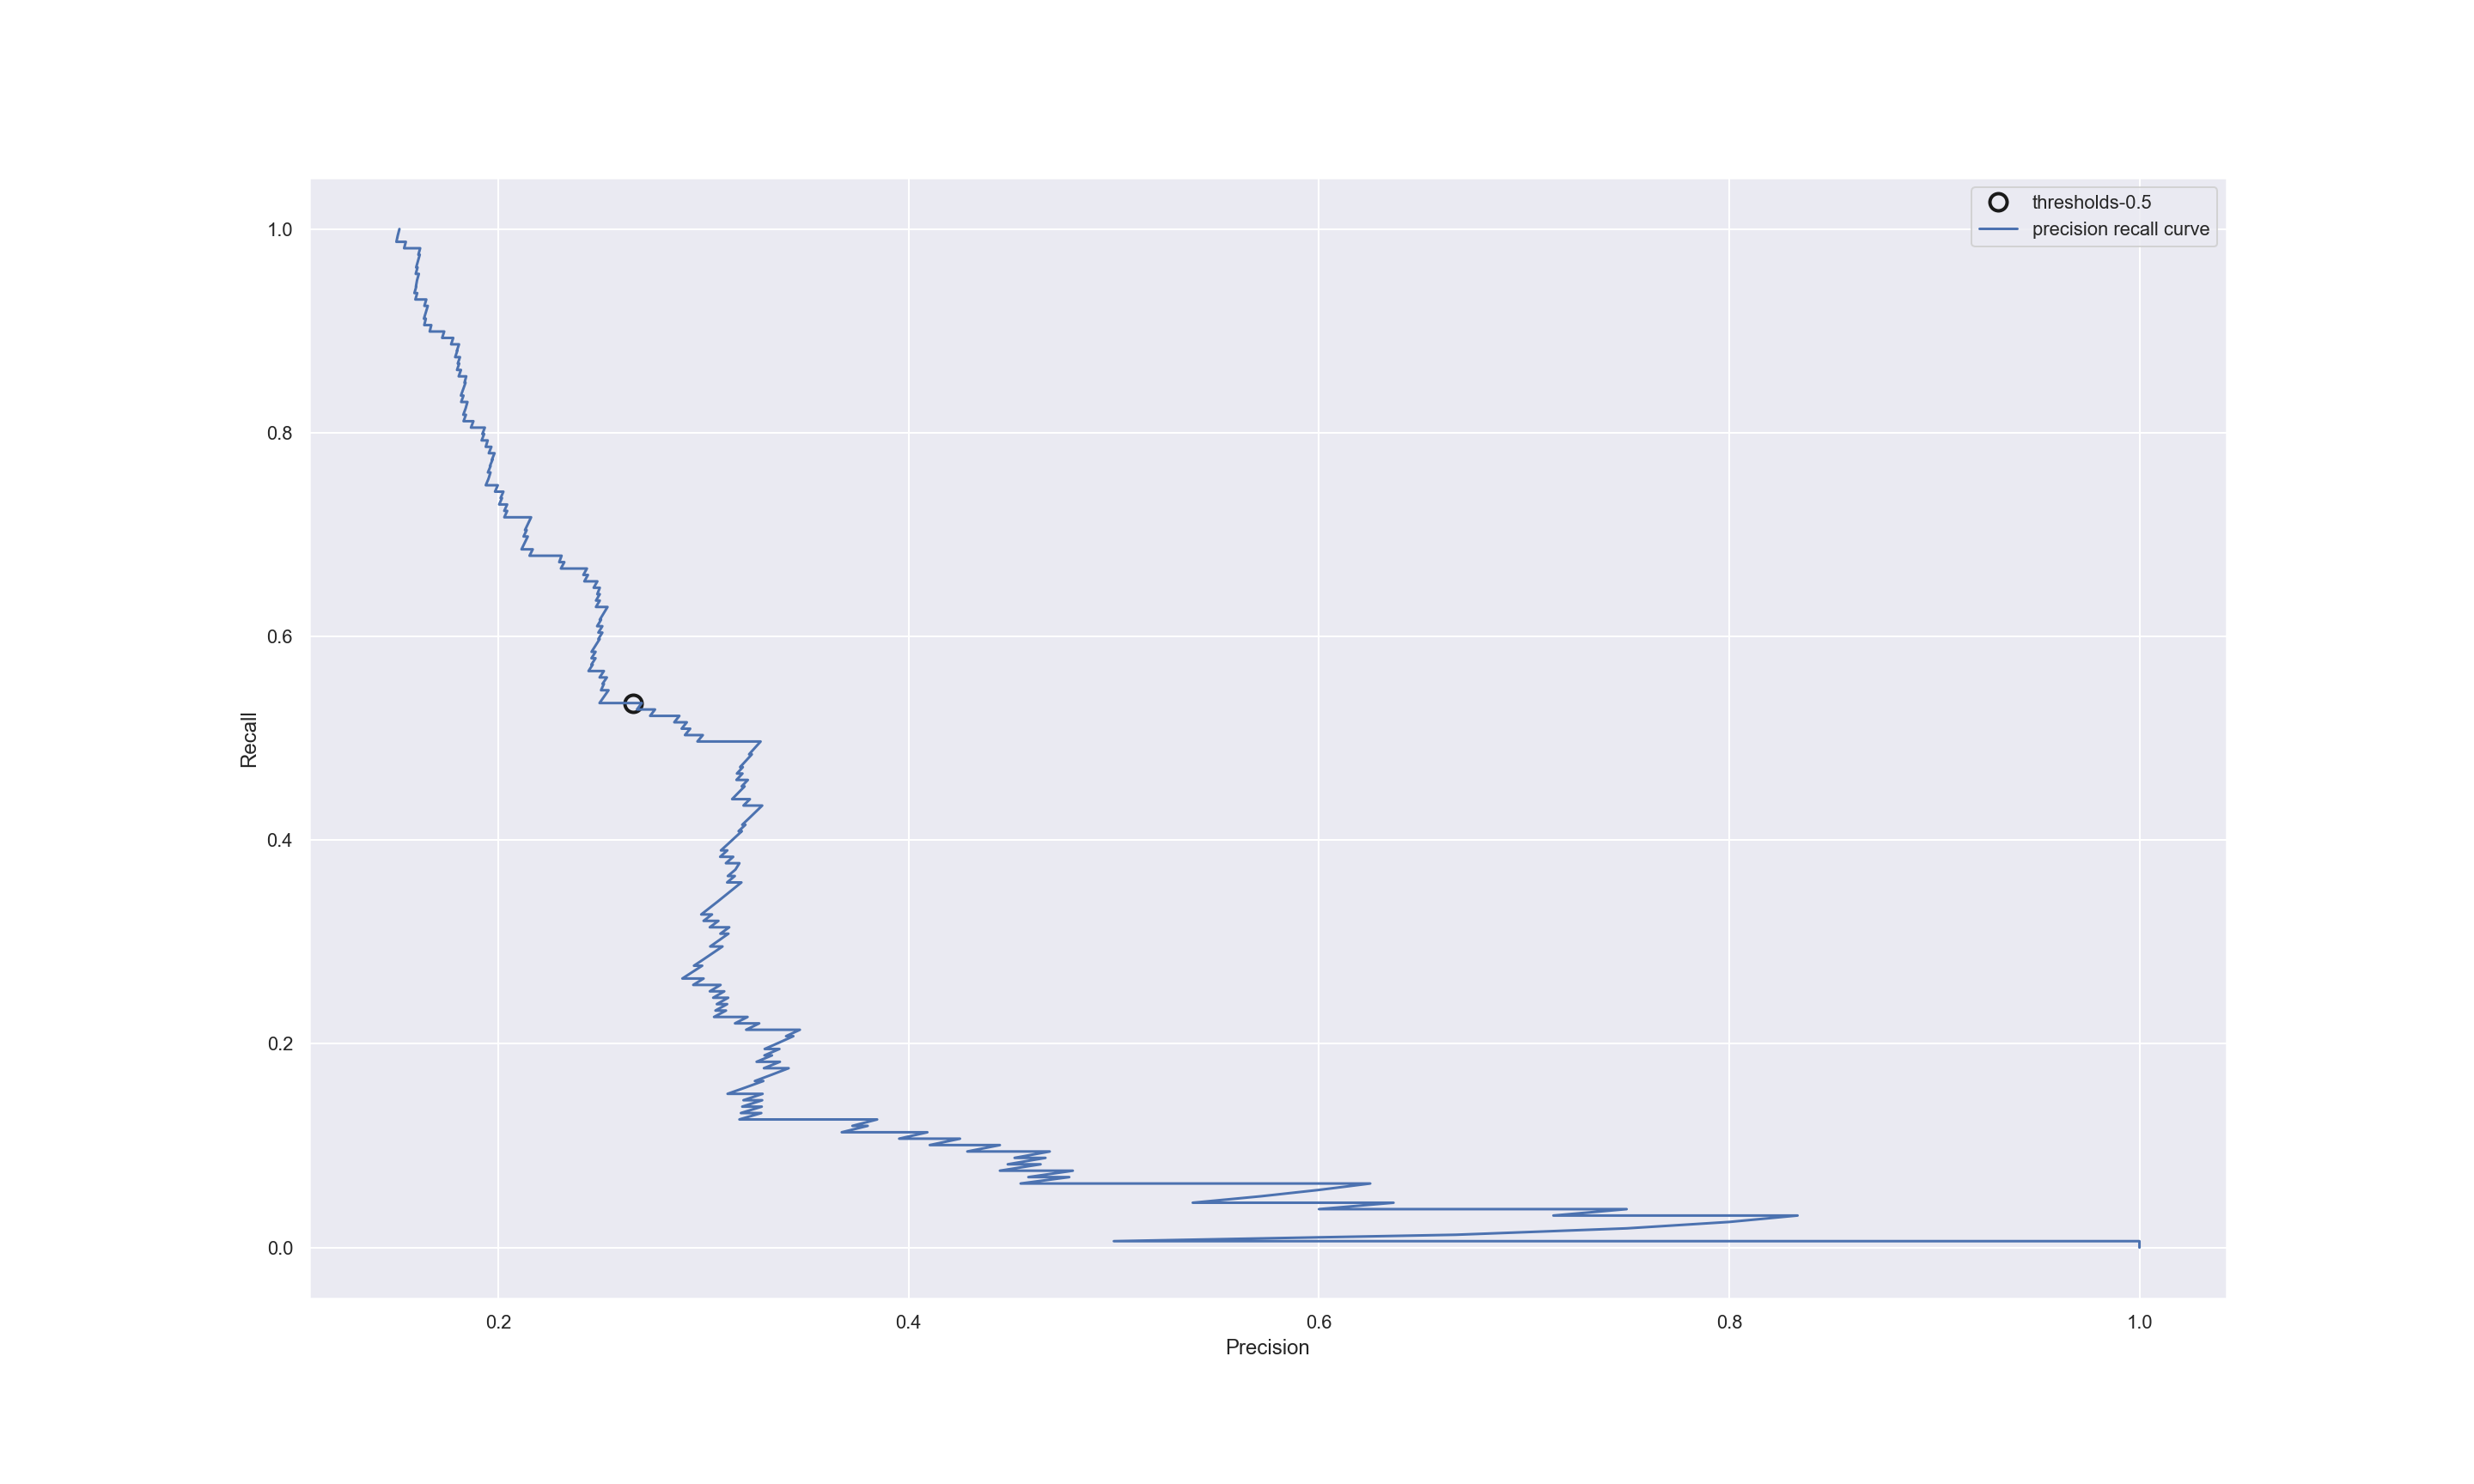

In [118]:
 import mglearn
    
%matplotlib notebook

precision, recall, thresholds = precision_recall_curve(y_test, CV_bag.predict_proba(X_test)[:,1])

close_zero = np.argmin(np.abs(thresholds-0.2))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="thresholds-0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Bar plot showing Comparision Of recall score of various exceuted model at default thershold

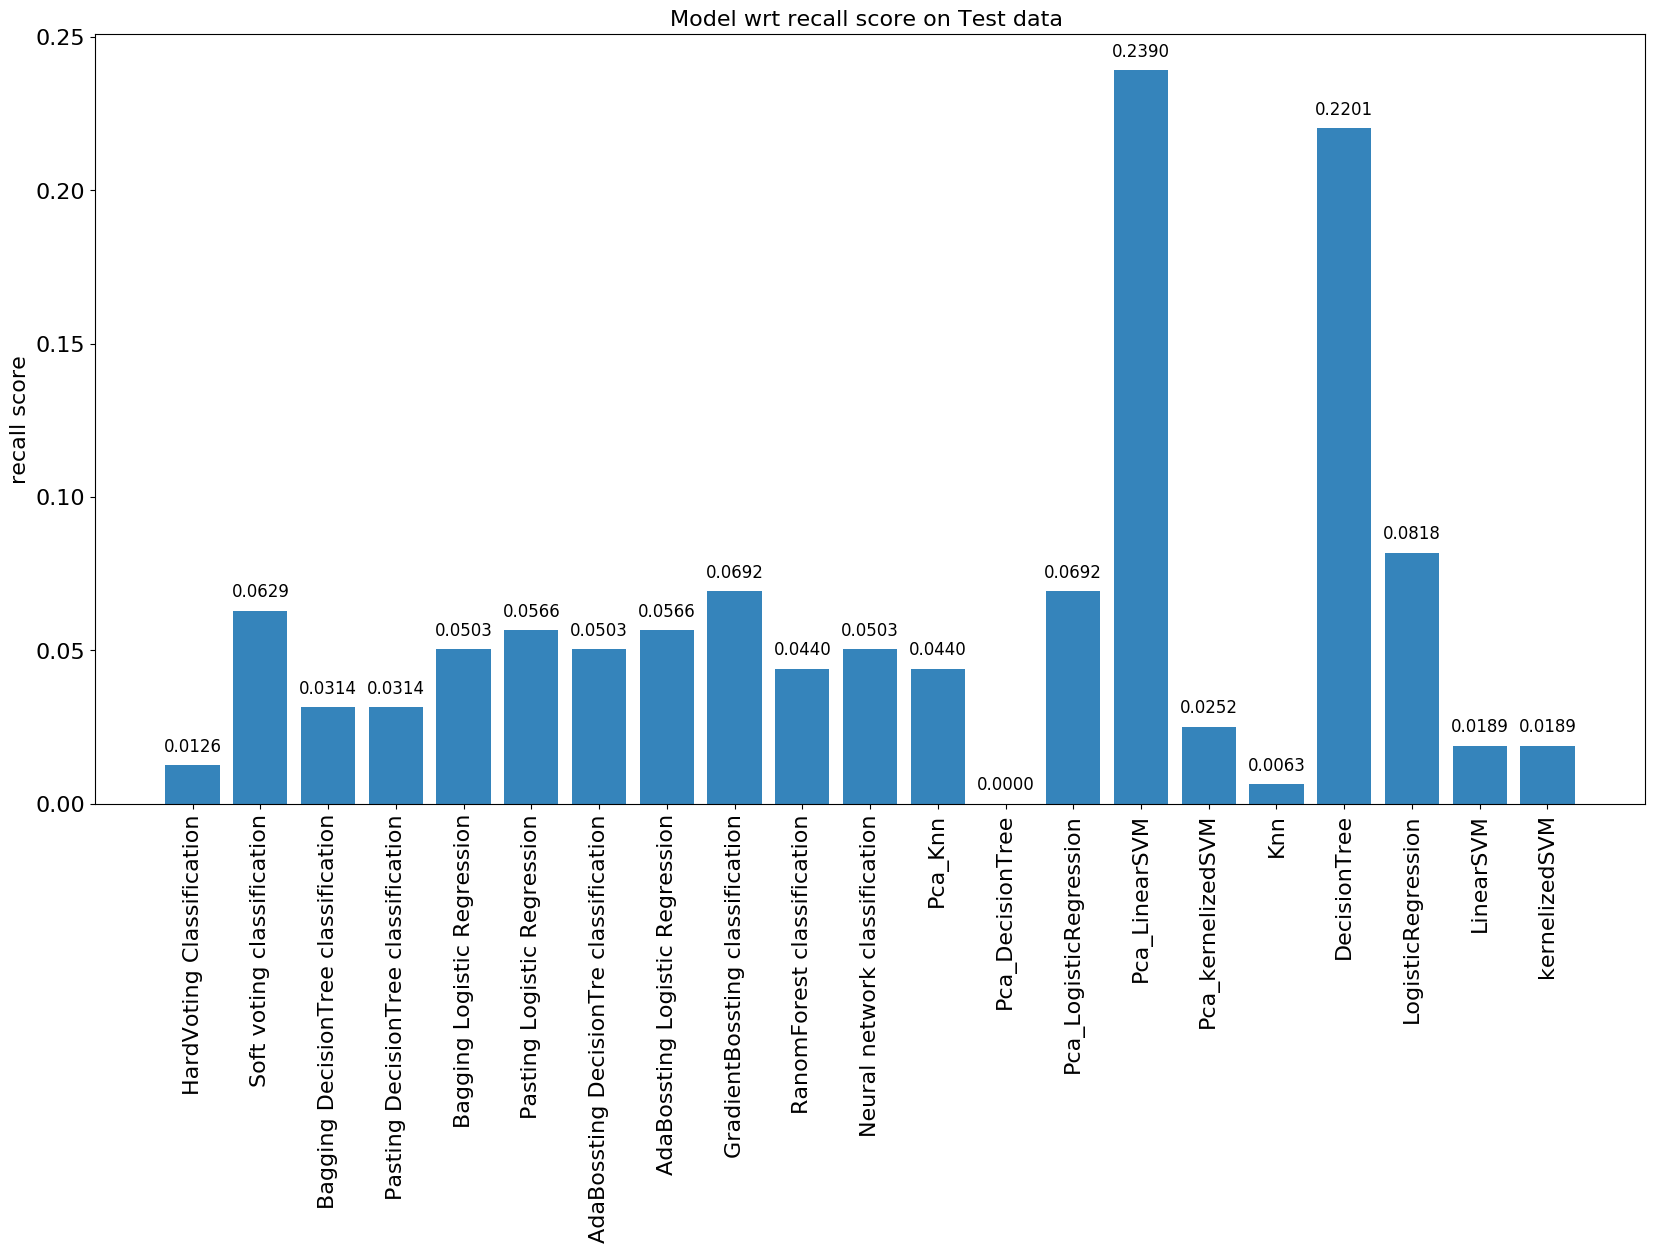

In [110]:
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.figure(figsize=(20,10))

objects = ('HardVoting Classification','Soft voting classification','Bagging DecisionTree classification','Pasting DecisionTree classification','Bagging Logistic Regression','Pasting Logistic Regression',
           'AdaBossting DecisionTre classification','AdaBossting Logistic Regression','GradientBossting classification','RanomForest classification',
           'Neural network classification',
           'Pca_Knn','Pca_DecisionTree','Pca_LogisticRegression','Pca_LinearSVM','Pca_kernelizedSVM',
           'Knn','DecisionTree','LogisticRegression','LinearSVM','kernelizedSVM')
y_pos = np.arange(len(objects))

performance = [rec_sc_HardVot,rec_sc_SoftVot,rec_sc_dt_bag,rec_sc_dt_pas,rec_sc_log_bag,rec_sc_log_pas,rec_sc_dt_ada,
               rec_sc_log_ada,rec_sc_gb,rec_sc_rf,rec_sc_neural,
               rec_sc_knn_pca,rec_sc_dt_pca,rec_sc_log_pca,rec_sc_LSVM_pca,rec_sc_KSVM_pca,
               rec_sc_knn,rec_sc_dtree,rec_sc_log,rec_sc_LSVM,rec_sc_KSVC]


plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects,rotation=90,size=16)
plt.yticks(size=16)
plt.ylabel('recall score',size=16)
plt.title('Model wrt recall score on Test data ',size=16)
#plt.text
for x,y in zip(y_pos,performance):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',size=12)
  
plt.show()

### Bar plot showing Comparision Of recall score of various exceuted model at  thershold 0.2

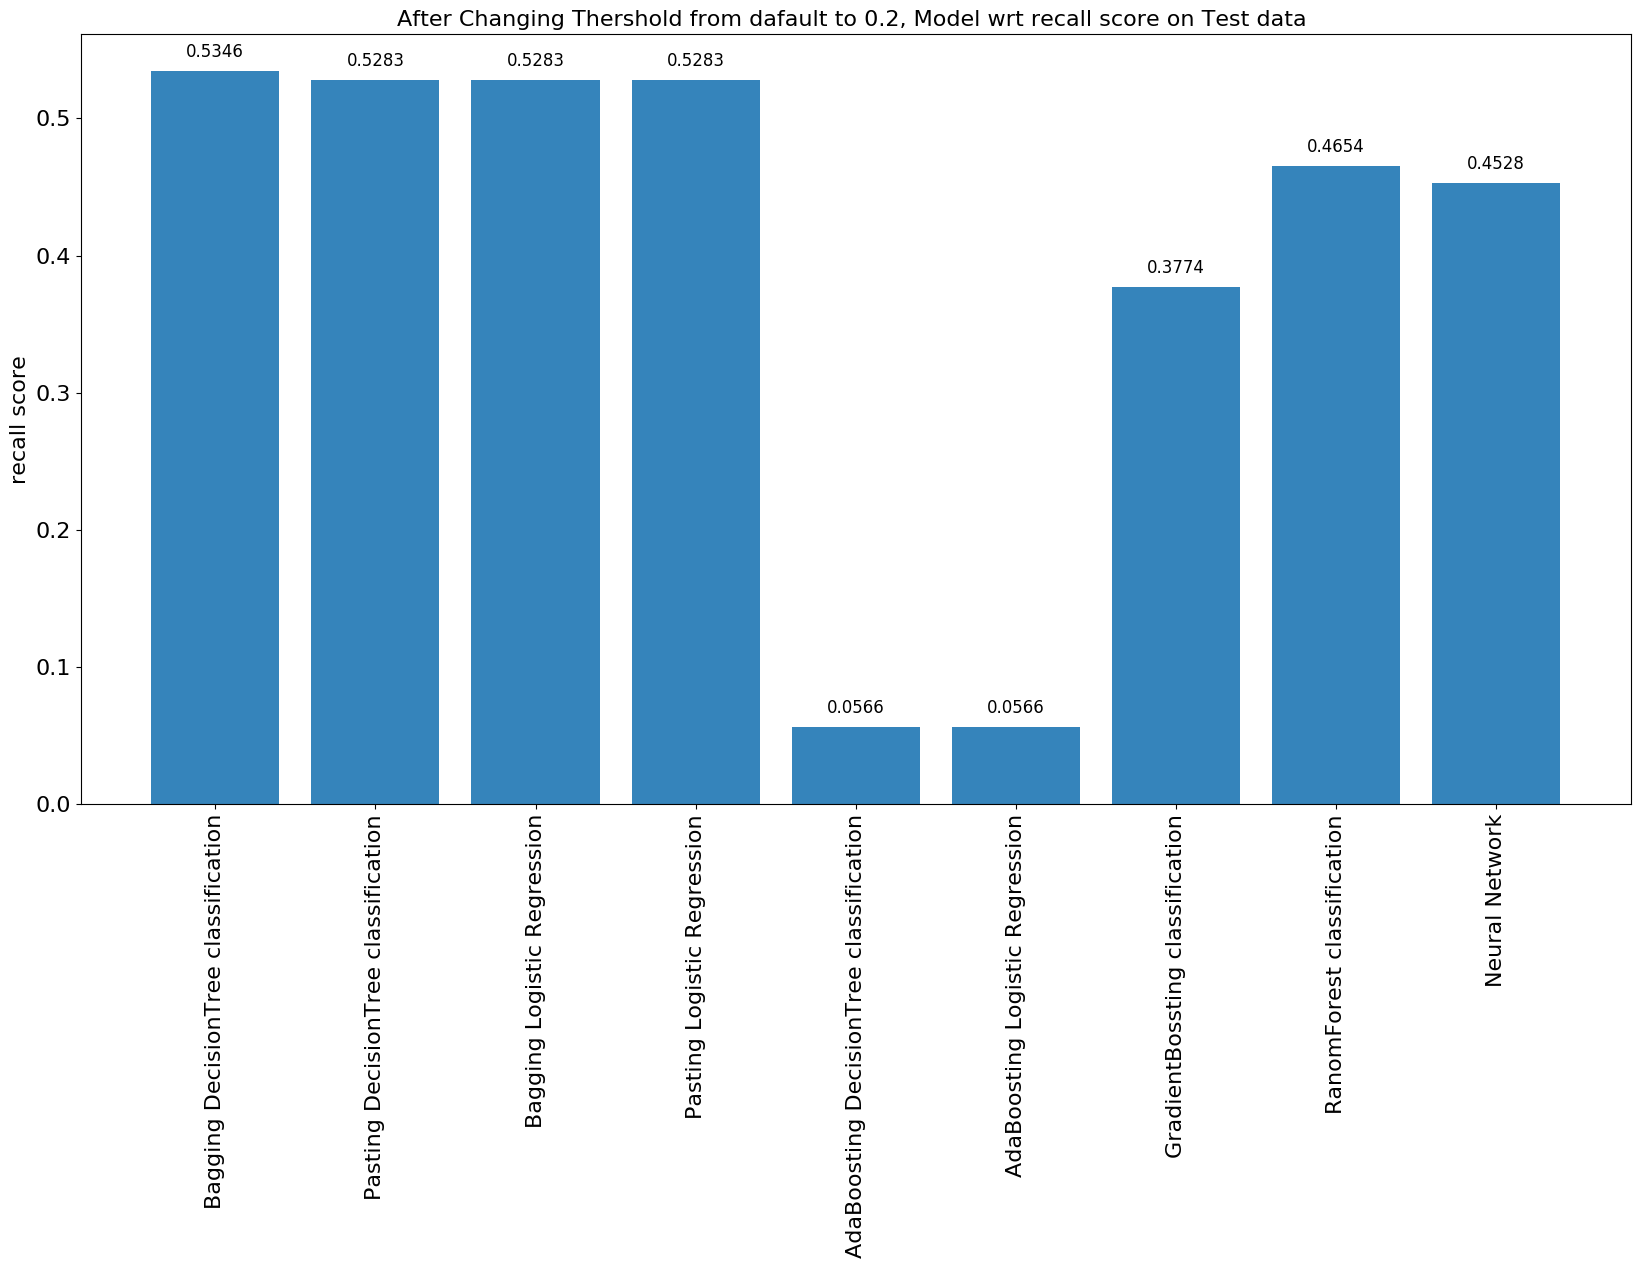

In [111]:
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.figure(figsize=(20,10))

objects = ('Bagging DecisionTree classification','Pasting DecisionTree classification','Bagging Logistic Regression','Pasting Logistic Regression',
           'AdaBoosting DecisionTree classification','AdaBoosting Logistic Regression','GradientBossting classification','RanomForest classification',
           'Neural Network')
y_pos = np.arange(len(objects))

performance = [rec_sc_dt_bag_new,rec_sc_dt_pas_new,rec_sc_log_bag_new,rec_sc_log_pas_new,
               rec_sc_dt_ada_new,rec_sc_log_ada_new,rec_sc_gb_new,rec_sc_rf_new,rec_sc_neural_new
               ]


plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects,rotation=90,size=16)
plt.yticks(size=16)
plt.ylabel('recall score',size=16)
plt.title('After Changing Thershold from default to 0.2, Model wrt recall score on Test data ',size=16)
#plt.text
for x,y in zip(y_pos,performance):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',size=12)
  
plt.show()

### [4] Bar Plot showing Comparision of PCA (Test Data) with Base Model

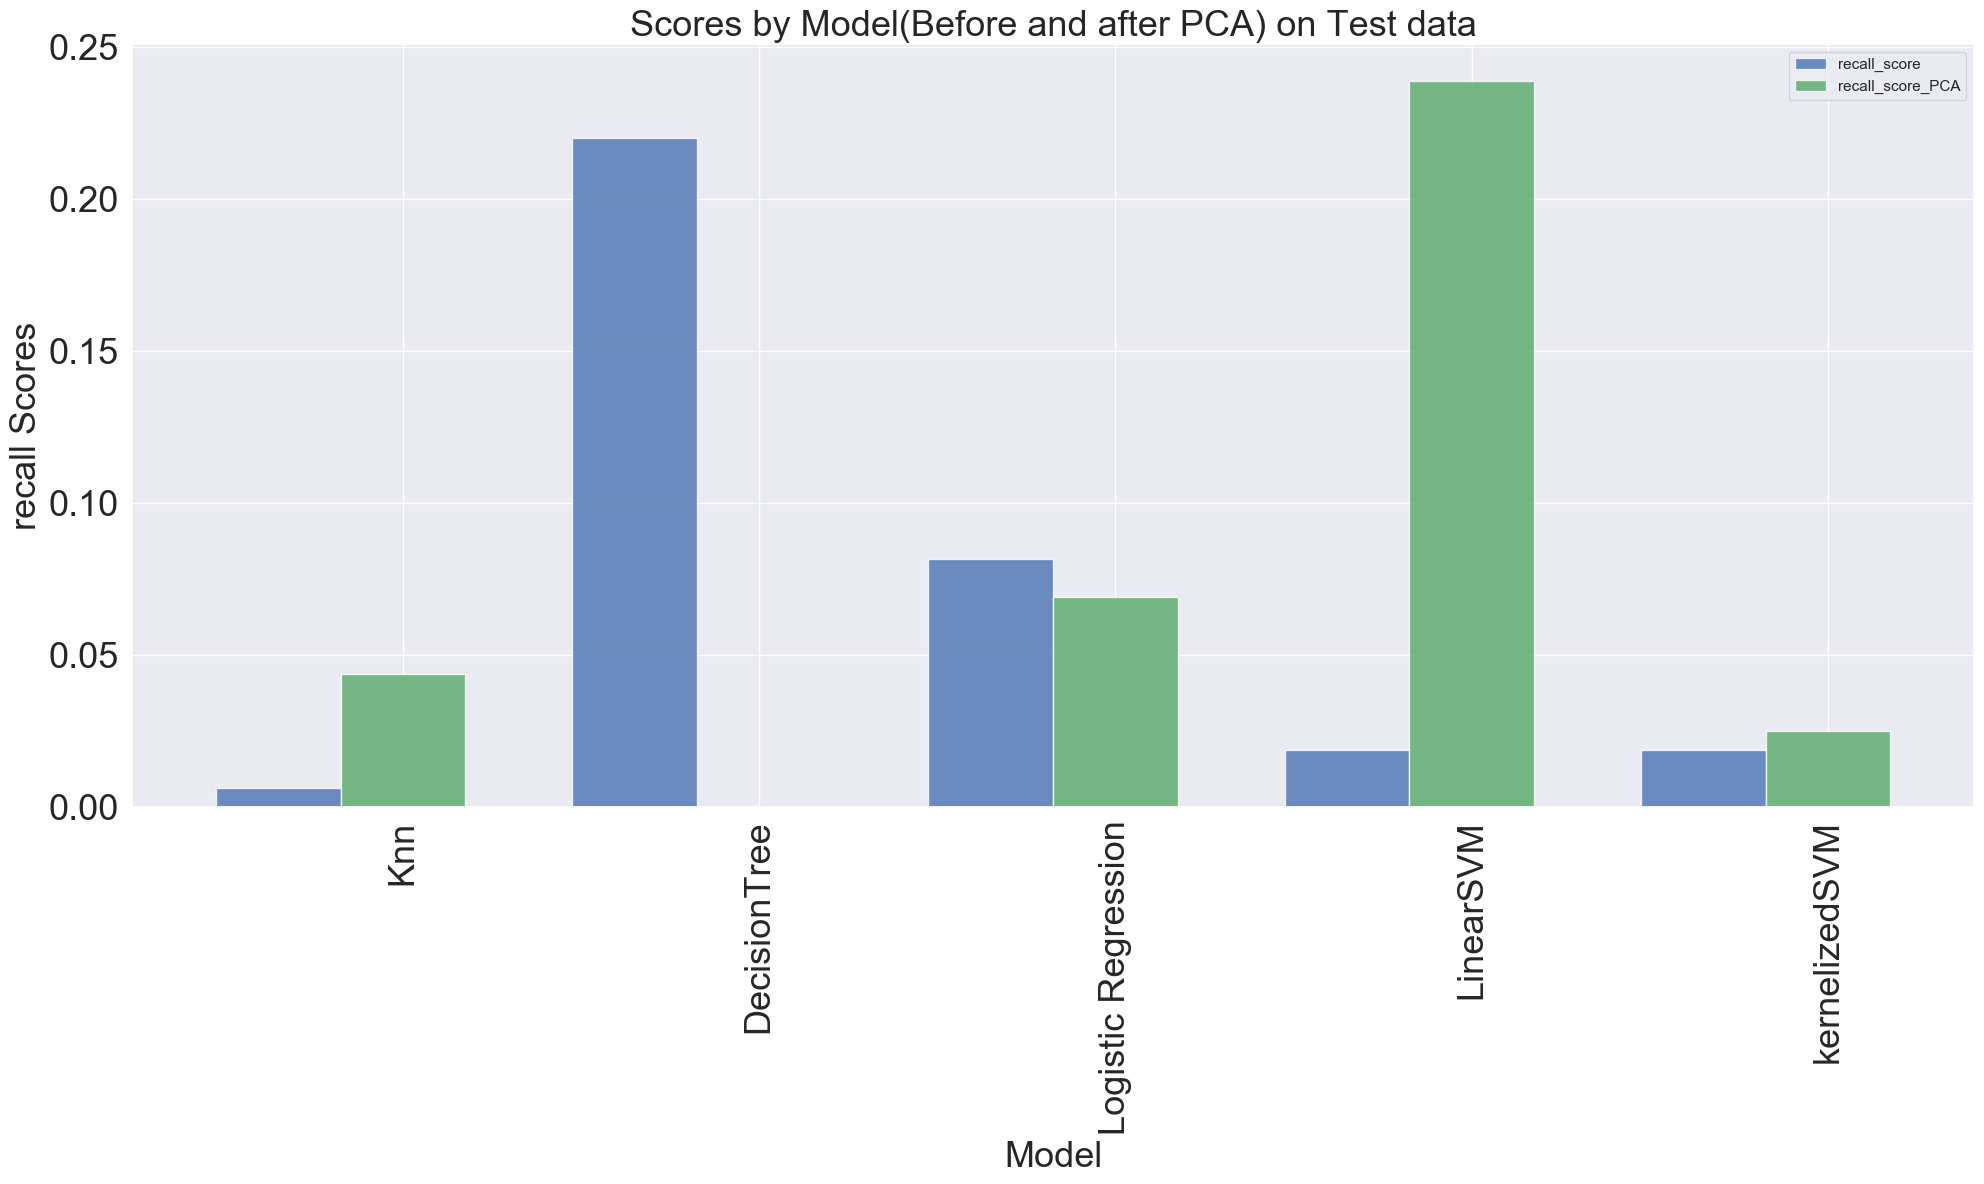

In [112]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,12)})
# data to plot
n_groups = 5

recall_score_PCA = [rec_sc_knn_pca,rec_sc_dt_pca,rec_sc_log_pca,rec_sc_LSVM_pca,rec_sc_KSVM_pca]
recall_score = [rec_sc_knn,rec_sc_dtree,rec_sc_log,rec_sc_LSVM,rec_sc_KSVC]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, recall_score, bar_width,
alpha=opacity,
color='b',
label='recall_score')

rects2 = plt.bar(index + bar_width, recall_score_PCA, bar_width,
alpha=opacity,
color='g',
label='recall_score_PCA')

plt.xlabel('Model',size=26)
plt.ylabel('recall Scores',size=26)
plt.title('Scores by Model(Before and after PCA) on Test data',size =26)
plt.xticks(index + bar_width, ('Knn','DecisionTree','Logistic Regression','LinearSVM','kernelizedSVM'),size=26,rotation=90)
plt.yticks(size=26)
plt.legend()

plt.tight_layout()
plt.show()

This plot shows that after Applying PCA (0.95) some imoprtant feature has lost as comparatively recall value has reduced than base model


## ROC curve

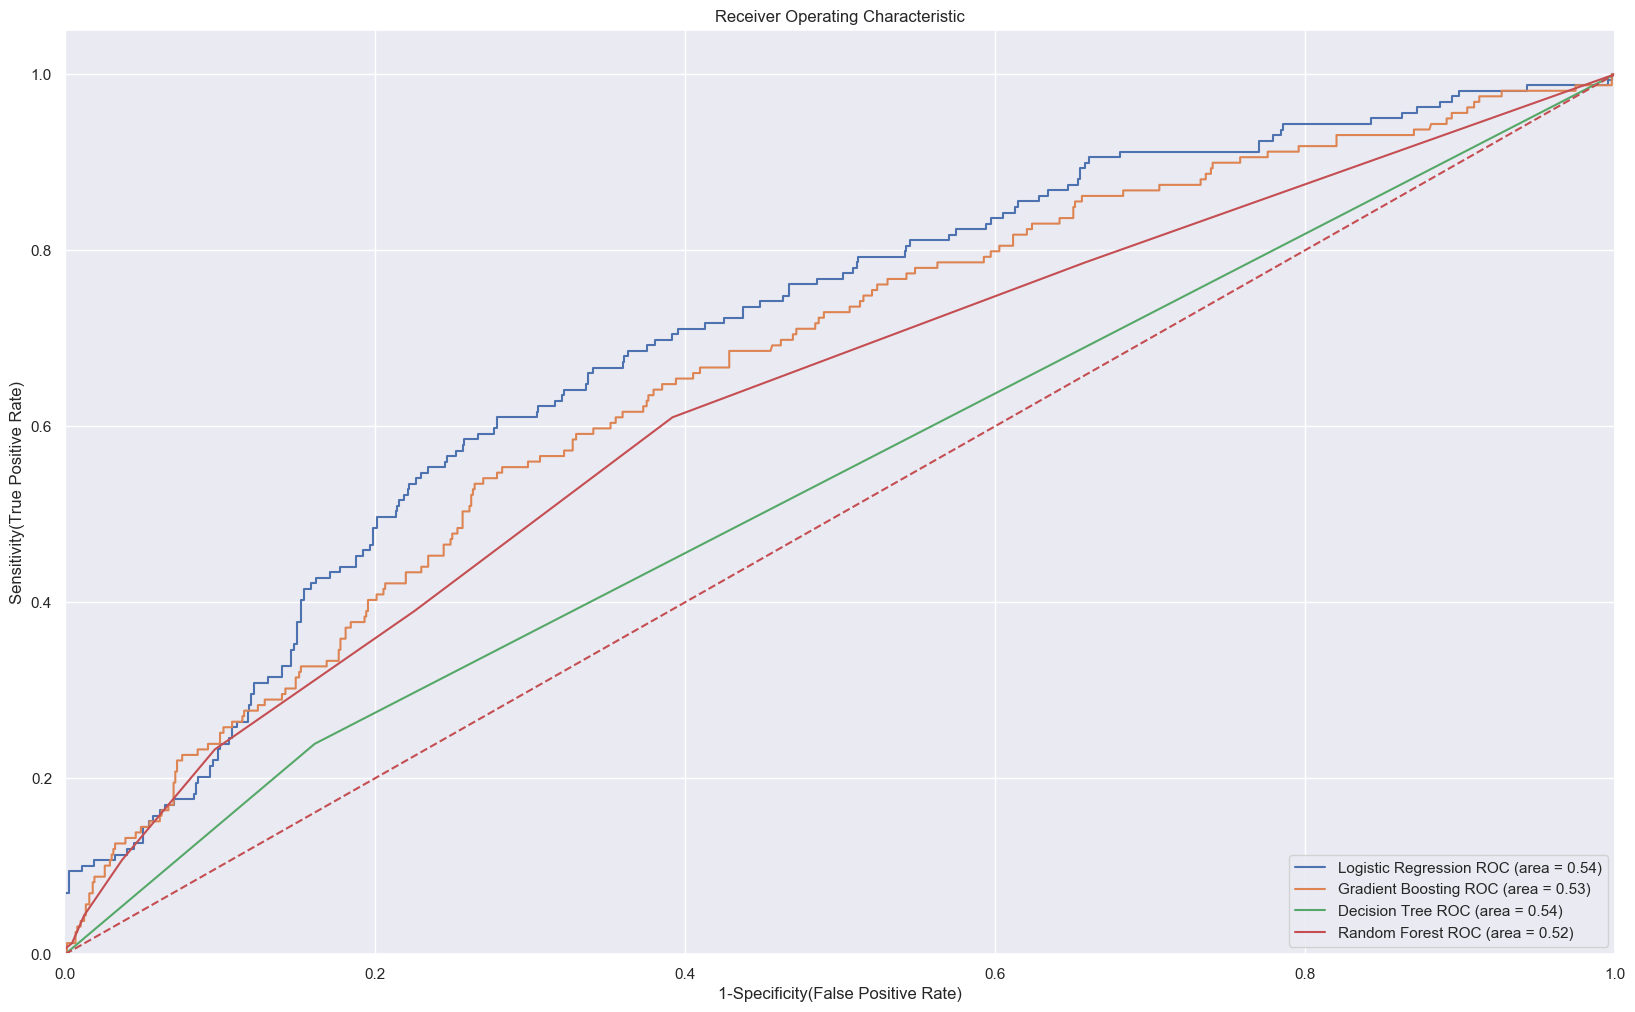

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
   
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display